## - Input Parameters
---


**1. WPS(Wire Positioning System) : 80 parameters **

- HU1:WPS:DW01:X_R / HU1:WPS:UP01:X_R 
- HU1:WPS:DW01:Y_R / HU1:WPS:UP01:Y_R 
- HU1:WPS:DW02:X_R / HU1:WPS:DW02:X_R
- HU1:WPS:DW02:Y_R / HU1:WPS:DW02:Y_R

                ......
                ......

- HU1:WPS:DW20:X_R / HU1:WPS:UP20:X_R
- HU1:WPS:DW20:Y_R / HU1:WPS:UP20:X_R


**2. HLS(Hydrostatic Level System) : 25 parameters ** 

- INJ:HLS01:HLS_R
- HL2:HLS01:HLS_R
- HL2:HLS02:HLS_R
- HL3B:HLS01:HLS_R 
- HL4:HLS01:HLS_R
- HL4:HLS02:HLS_R 
- HL4:HLS03:HLS_R
- HL4:HLS04:HLS_R 
- HBTL:HLS01:HLS_R
- HU1:HLS01:HLS_R 
- HU1:HLS02:HLS_R
- HU1:HLS03:HLS_R

...
...

- HU1:HLS12:HLS_R
- HU1E:HLS01:HLS_R 
- BL:HX:EH:HLS01:HLS_R

**3. SBPM(Stripline Beam Postion Monitor)**

**4. CBPM(Stripline Beam Postion Monitor)**

**5. BC(Buch Compressor)**

**Import Library**

In [1]:
import urllib3
import json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import json 
import urllib3

http = urllib3.PoolManager()
r = http.request('GET', 'http://192.168.1.213:17668/retrieval/data/getData.json?
                 pv=pv_name + 
                '&from=' + start_date + '.000Z'+
                '&to=' + end_date + '.000Z')
data = json.loads(r.data.decode('utf-8')) # load data using 'utf-8' decoding

with open(str('data/json_data/input/' + pv_name + '.json'), 'w') as fp:
    json.dump(data, fp)

**Data Handling Function**

In [16]:
class data_pre:
    
    def pooling(self, parameter_list, save_list, start_date='2017-10-21T00%3A00%3A01', end_date='2017-12-31T23%3A59%3A59'):
        
        '''
        After loading from server data, save data(format:json) to local   

        Arguement

        parameter_list : list of all data that we will load
        save_list : json saving name of list
        start_date : start date of loading (ex 2017-01-01T03%3A47%3A25 : 2017-01-01 3:47:25)
        end_date : end date of loading (ex 2017-12-31T17%3A56%3A18 : 2017-12-31 17:56:18)
        '''
        
        # load data from server
        
        for i in range(len(parameter_list)):
            
            http = urllib3.PoolManager()
            r = http.request('GET', 'http://192.168.1.213:17668/retrieval/data/getData.json?pv=' + str(parameter_list[i]) + 
                             '&from=' + start_date + '.000Z'+
                             '&to=' + end_date + '.000Z')
            data = json.loads(r.data.decode('utf-8')) # load data using 'utf-8' decoding

         # Save the parameter_list files

            with open(str('data/json_data/input/'+ save_list[i] + '.json'), 'w') as fp:
                json.dump(data, fp)

        print("All parameters are saved to json format")        
        
        
    def json_to_csv(self, json_list, param_dir, csv_list):
        '''
        Convert json format to csv format and remove unnecessary columns
        
        Argument
        
        json_list : json file 
        param_dir : saving directory
        csv_name_list : 
        '''
    
        for i in range(len(json_list)):
            param = pd.read_json("./data/json_data/input/" + param_dir + "/" + json_list[i] + ".json")
            param_df = pd.DataFrame(param.data[0][1:-1])
            param_df = param_df.drop(labels=['severity', 'status'], axis=1)
            param_df = param_df[['secs','nanos','val']]
            param_df.to_csv("./data/csv_data/input/" + param_dir + "/" + csv_list[i] + ".csv", index=False)

        print("All json data are converted to csv files")
        
        
    def load_csv(self, csv_list, param_dir):

        param_list = []
        for i in range(len(csv_list)):
            param_list.append(pd.read_csv("./data/csv_data/input/" + param_dir + "/" + csv_list[i] + '.csv'))

        return param_list

**Data Visualization Function**

In [16]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

def density_plot(ls, param_name):
    
    for i in range(len(ls)):
        data = ls[i].val
        data.plot.kde(figsize=(10,10))
        plt.savefig('./image/' + param_name + str(i+1) + '_kde.png')
        plt.show()
        plt.close()
        
def bar_plot(ls, param_name):
    
    for i in range(len(ls)):
        data = ls[i].val
        data.plot(kind='bar', figsize=(10,10))
        plt.savefig('./image/' + param_name + str(i+1) + '_bar.png')
        plt.show()
        plt.close()   
        
def hist_plot(ls, param_name):        

    for i in range(len(ls)):
        data = ls[i].val
        data.plot(kind='hist', figsize=(10,10), bins=100)
        plt.savefig('./image/' + param_name + str(i+1) + '_hist.png')
        plt.show()
        plt.close()   
        
def scatter_plot(ls, param_name, s=2):
    
    for i in range(len(ls)):
        ls[i].plot(x='secs', y='val', kind='scatter', s=s, figsize=(10,10))
        plt.savefig('./image/' + param_name + str(i+1) + '_scatter.png')
        plt.show()
        plt.close()
        
def make_xy_df(x, y):
    
    x = x.drop(labels=['secs', 'nanos'], axis=1)
    x = x.rename(columns={'val':'x'})
    x['secs'] = np.array(np.arange(1, len(x)+1))
    x = x[['secs','x']]
    
    y = y.drop(labels=['secs', 'nanos'], axis=1)
    y = y.rename(columns={'val':'y'})
    y['secs'] = np.array(np.arange(1, len(y)+1))
    y = y[['secs','y']]
    
    xy = pd.merge(x, y, on = 'secs')
    
    return xy

def make_3d_scatter(x, y, z):

    fig = plt.figure(figsize=(15,15))
    ax = fig.gca(projection='3d')
    ax.scatter(x, y, z, s=2)
    ax.legend()
    ax.set_xlabel('x', labelpad=20)
    ax.set_ylabel('secs', labelpad=20)
    ax.set_zlabel('y', labelpad=20)
    plt.savefig('./image/3d_plot.png')
    plt.show()                

## WPS
---

**Make WPS List**

In [44]:
def make_wps(length, sort, form):
    
    '''
    Arguments
    
    length : 
    sort : 'DW' or 'UP
    form : ':' or '-'
    '''
    
    wps = []
    
    for i in range(1, length+1):
        for pv in ['X_R', 'Y_R']:
            if i < 10:
                wps.append('HU1'+ form + 'WPS' + form + sort + '0'+ str(i) + form + pv)
            else:
                wps.append('HU1' + form + 'WPS' + form + sort + str(i) + form + pv)
    return wps

In [47]:
wps_dw_list = make_wps(length=20, sort='DW', form=':')
wps_dw_json = make_wps(length=20, sort='DW', form='-')
wps_dw_csv = make_wps(length=20, sort='DW', form='-')

wps_up_list = make_wps(length=20, sort='UP', form=':')
wps_up_json = make_wps(length=20, sort='UP', form='-')
wps_up_csv = make_wps(length=20, sort='DW', form='-')

**Data Pooling**

In [6]:
data_prep = data_pre()
data_prep.pooling(wps_dw_list, wps_dw_json)
data_prep.pooling(wps_up_list, wps_up_json)

**Converting format : json to csv**

In [8]:
data_prep.json_to_csv(wps_dw_json, param_dir='wps', wps_dw_csv)
data_prep.json_to_csv(wps_up_json, param_dir='wps', wps_up_csv)

**Visualization(3d Plot)**

In [48]:
data_prep = data_pre()
wps_dw = data_prep.load_csv(wps_dw_csv, param_dir='wps')
wps_up = data_prep.load_csv(wps_up_csv, param_dir='wps')

## HLS
----

**Make HLS List**

In [22]:
lines_list = ['INJ', 'HL2', 'HL3B', 'HL4', 'HBTL', 'HU1', 'HU1E', 'BL:HX:EH','BL:HX:OH']
lines_json = ['INJ', 'HL2', 'HL3B', 'HL4', 'HBTL', 'HU1', 'HU1E', 'BL-HX-EH','BL-HX-OH']      

def make_hls(lines, form):
    '''
    Arguments
        lines :
        form : ':' or '-'
    
    '''
    hls = []
    lengths = [1, 2, 1, 4, 1, 12, 1, 1, 2]
    
    i = 0
    
    for line in lines:
        for j in range(lengths[i]):
            if j < 9:
                hls.append(line + form + 'HLS0' + str(j+1) + form + 'HLS_R')
            else:
                hls.append(line + form + 'HLS' + str(j+1) + form + 'HLS_R')
        i += 1
        
    return hls                          

In [20]:
hls_list = make_hls(lines_list, ':')
hls_json = make_hls(lines_list, '-')
hls_csv = make_hls(lines_list, '-')

**Data Pooling**

In [21]:
data_prep = data_pre()
data_prep.pooling(hls_list, hls_json)

**Converting format : json to csv**

In [23]:
data_prep.json_to_csv(hls_json, param_dir='input/hls/' , hls_csv)

**Visualization**

In [54]:
data_prep = data_pre()
hls = data_prep.load_csv(hls_csv, param_name='hls')
scatter_plot(hls, 'hls')

**Combining tow scatter plot**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
xy_down1.x = scaler.fit_transform(xy_down1.x.values.reshape(-1,1))
xy_down1.y = scaler.fit_transform(xy_down1.y.values.reshape(-1,1))
xy_down20.x = scaler.fit_transform(xy_down20.x.values.reshape(-1,1))
xy_down20.y = scaler.fit_transform(xy_down20.y.values.reshape(-1,1))

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np


dw1 = (xy_down1.secs, xy_down1.x, xy_down1.y)
dw2 = (xy_down20.secs, xy_down20.x, xy_down20.y)

data = (dw1, dw2)
colors = ("red", "blue")
groups = ("xy_down1", "xy_down20") 
 
# Create plot
fig = plt.figure(figsize=(18,18))
ax = fig.gca(projection='3d')

for data, color, group in zip(data, colors, groups):
    x, y, z = data
    ax.scatter(x, y, z, alpha=0.4, c=color, edgecolors='none', s=3, label=group)
plt.legend(loc=0)
plt.xlabel("Seconds")
plt.savefig('./image/WPS_x_y_down_3dplot.png')
plt.show()

In [ ]:
scaler = MinMaxScaler()
xy_up1.x = scaler.fit_transform(xy_up1.x.values.reshape(-1,1))
xy_up1.y = scaler.fit_transform(xy_up1.y.values.reshape(-1,1))
xy_up20.x = scaler.fit_transform(xy_up20.x.values.reshape(-1,1))
xy_up20.y = scaler.fit_transform(xy_up20.y.values.reshape(-1,1))

In [ ]:
up1 = (xy_up1.secs, xy_up1.x, xy_up1.y)
up2 = (xy_up20.secs, xy_up20.x, xy_up20.y)

data = (up1, up2)
colors = ("red", "blue")
groups = ("xy_up1", "xy_up20") 
 
# Create plot
fig = plt.figure(figsize=(18,18))
ax = fig.gca(projection='3d')
 
for data, color, group in zip(data, colors, groups):
    x, y, z = data
    ax.scatter(x, y, z, alpha=0.4, c=color, edgecolors='none', s=3, label=group)
plt.legend(loc=0)
plt.xlabel("Seconds")
plt.savefig('./image/WPS_x_y_up_3dplot.png')
plt.show()

## Stripline BPM(SBPM)
---

**Make SBPM List**

In [35]:
def make_sbpm(form):
    '''
    Argument
    
        form : ':' or '-'
    '''
    
    sbpm = []
    
    sorts1 = ['INJ', 'HU1E']
    indice1 = ['IN', 'HD']
    length1 = [9, 4]
    axis= ['X', 'Y']
    
    i = 0
    for sort1 in sorts1:
        for j in range(length1[i]):
            for ax in axis:
                sbpm.append(sort1 + form + 'SBPM' + form + indice1[i] + '0' + str(j+1) + form + ax)
        i += 1
        
    sorts2 = ['HL1', 'HL2', 'HL3A', 'HL3B', 'HL4']
    indice2 = ['HL']
    length2 = [13, 25, 6, 11, 29]
    leng = 1
    
    i = 0
    for sort2 in sorts2:
        for j in range(leng, leng+length2[i]):
            for ax in axis:
                if j < 10:
                     sbpm.append(sort2 + form + 'SBPM' + form + 'HL0' + str(j) + form + ax)
                else:
                    sbpm.append(sort2 + form + 'SBPM' + form + 'HL' + str(j) + form + ax)
        leng = leng + length2[i]            
        i += 1
                    
    return sbpm

In [36]:
sbpm_list = make_sbpm(':')
sbpm_json = make_sbpm('-')

**Data Pooling**

In [39]:
data_prep = data_pre()
data_prep.pooling(sbpm_list, sbpm_json)

## Cavity BPM(CBPM)
---

**Make CBPM List**

In [9]:
def make_cbpm(form):
    '''
    Argument
        form : ':' or '-'
    '''
    cbpm = []
    
    for i in range(31):
        if i < 9:
            cbpm.append('HU1' + form + 'CBPM' + form + 'HU0' + str(i+1) + form + 'X')
            cbpm.append('HU1' + form + 'CBPM' + form + 'HU0' + str(i+1) + form + 'Y')
        else:
            cbpm.append('HU1' + form + 'CBPM' + form + 'HU' + str(i+1) + form + 'X')
            cbpm.append('HU1' + form + 'CBPM' + form +'HU' + str(i+1) + form + 'Y')
            
    for j in range(18):
        if j < 9:
            cbpm.append('SU1' + form + 'CBPM' + form + 'SU0' + str(j+1) + form + 'X')
            cbpm.append('SU1' + form + 'CBPM' + form + 'SU0' + str(j+1) + form + 'Y')
        else:
            cbpm.append('SU1' + form + 'CBPM' + form + 'SU' + str(j+1) + form + 'X')
            cbpm.append('SU1' + form + 'CBPM' + form + 'SU' + str(j+1) + form + 'Y')        
    
    return cbpm

In [10]:
cbpm_list = make_cbpm(':')
cbpm_json = make_cbpm('-')
cbpm_csv = make_cbpm('-')

In [67]:
data_prep = data_pre()

**Data Pooling**

In [66]:
data_prep.pooling(cbpm_list, cbpm_json)

**Converting format : json to csv**

In [68]:
data_prep.json_to_csv(json_list=cbpm_json, param_dir='cbpm', csv_list=cbpm_csv)

All json data are converted to csv files


In [11]:
cbpm_hard = data_prep.load_csv(cbpm_csv[:62], 'cbpm')
cbpm_soft = data_prep.load_csv(cbpm_csv[62:], 'cbpm')

In [95]:
diff = []
for i in range(0, 62, 2):
    diff.append(len(cbpm_hard[i+1]) - len(cbpm_hard[i]))
print(diff)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [97]:
cbpm_hard_xy = []
for i in range(0, 62, 2):
    cbpm_hard_xy.append(make_xy_df(cbpm_hard[i], cbpm_hard[i+1]))

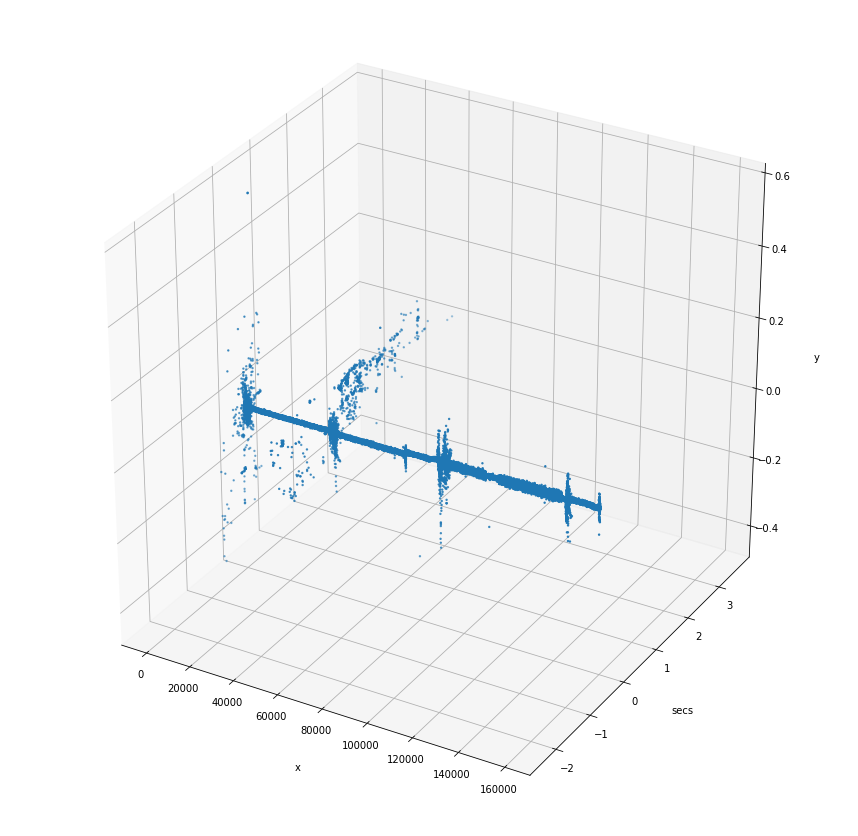

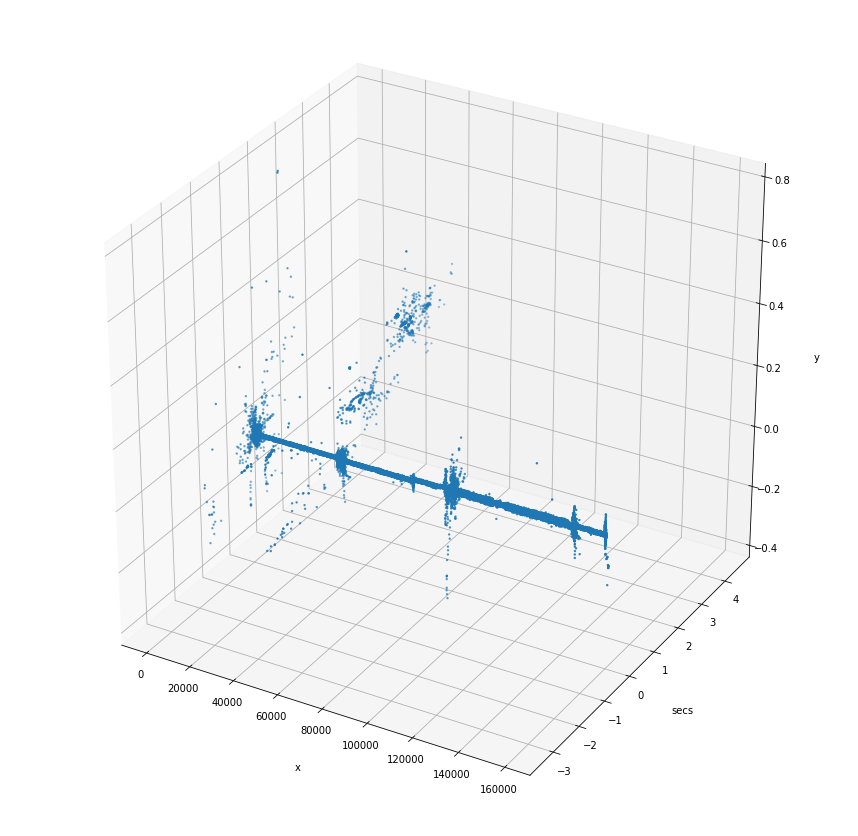

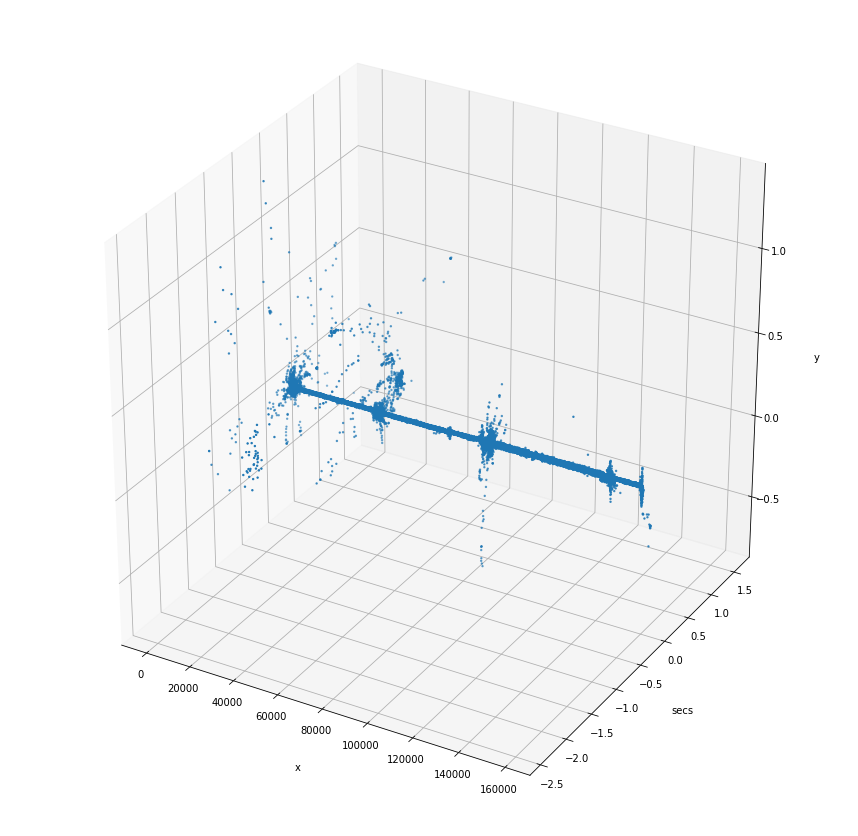

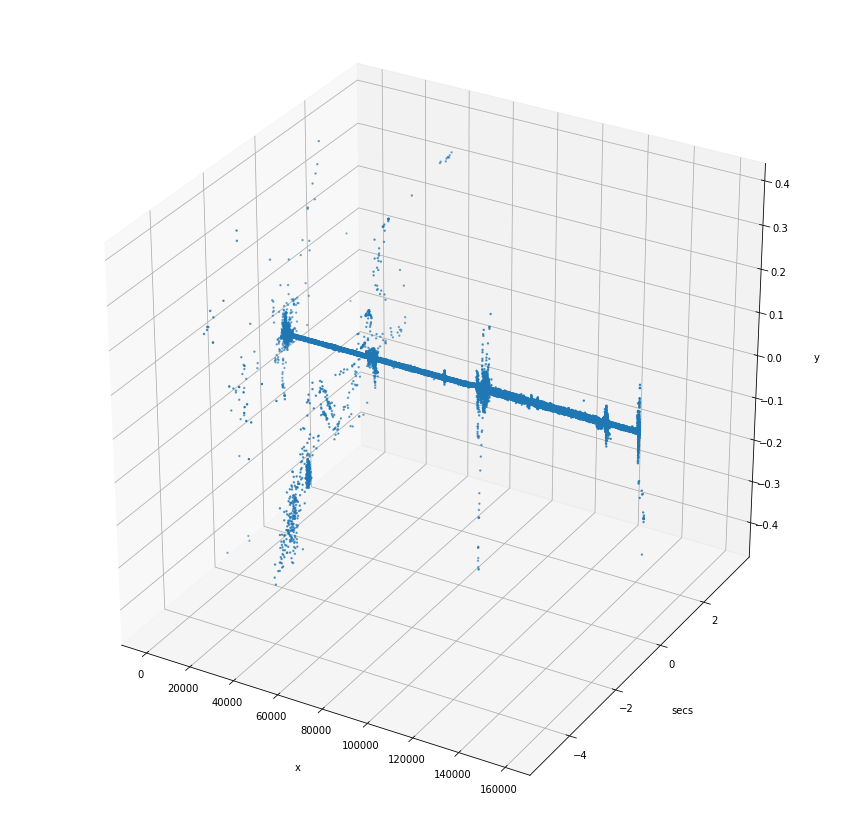

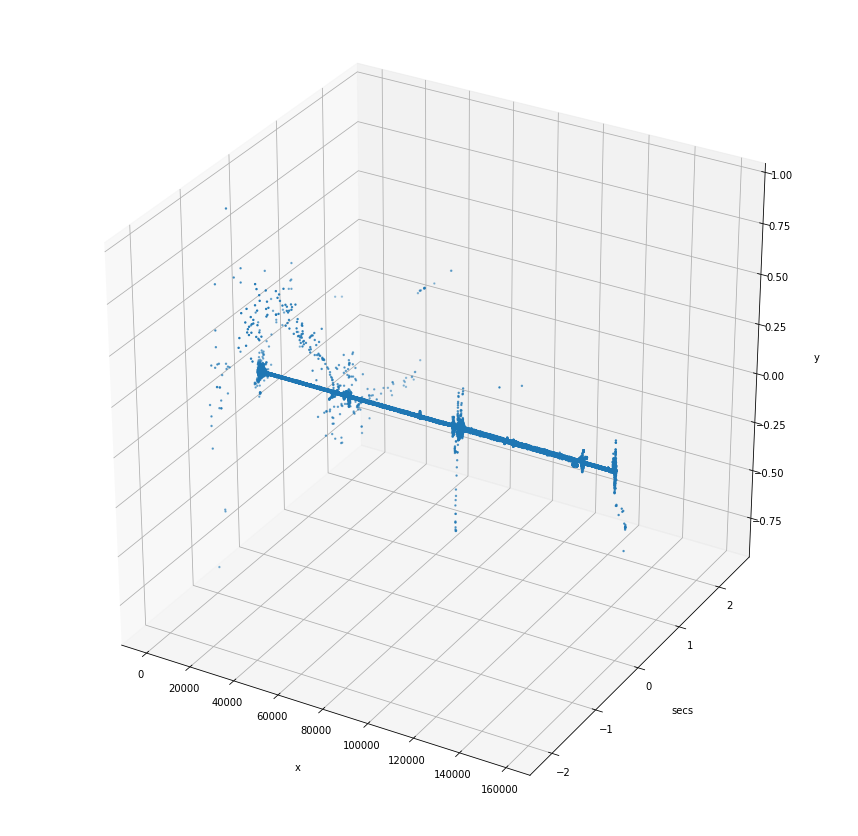

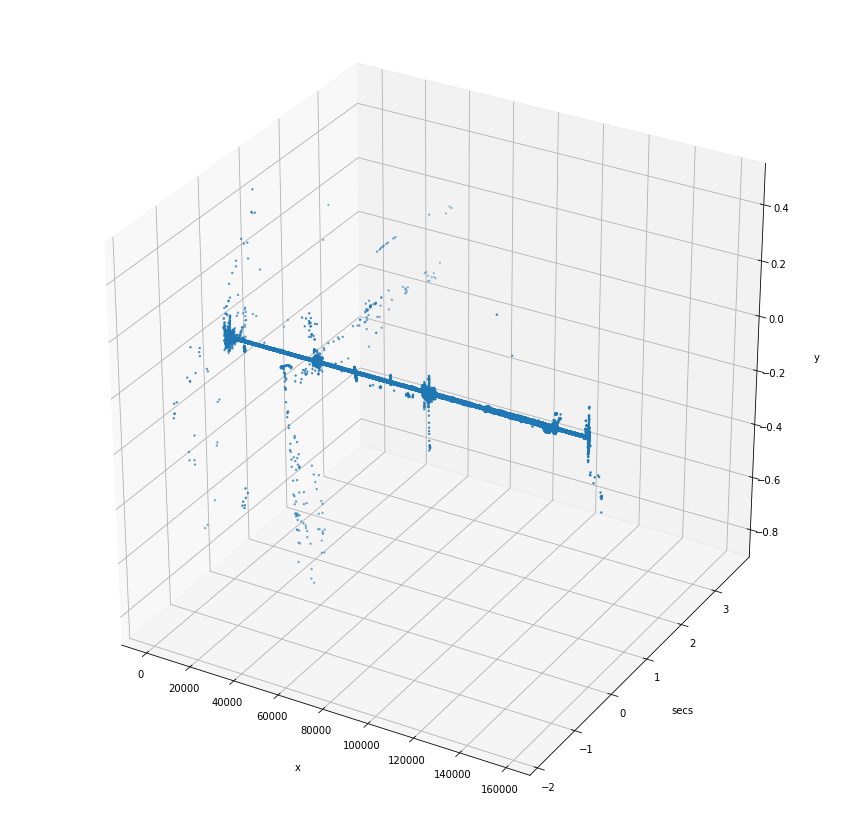

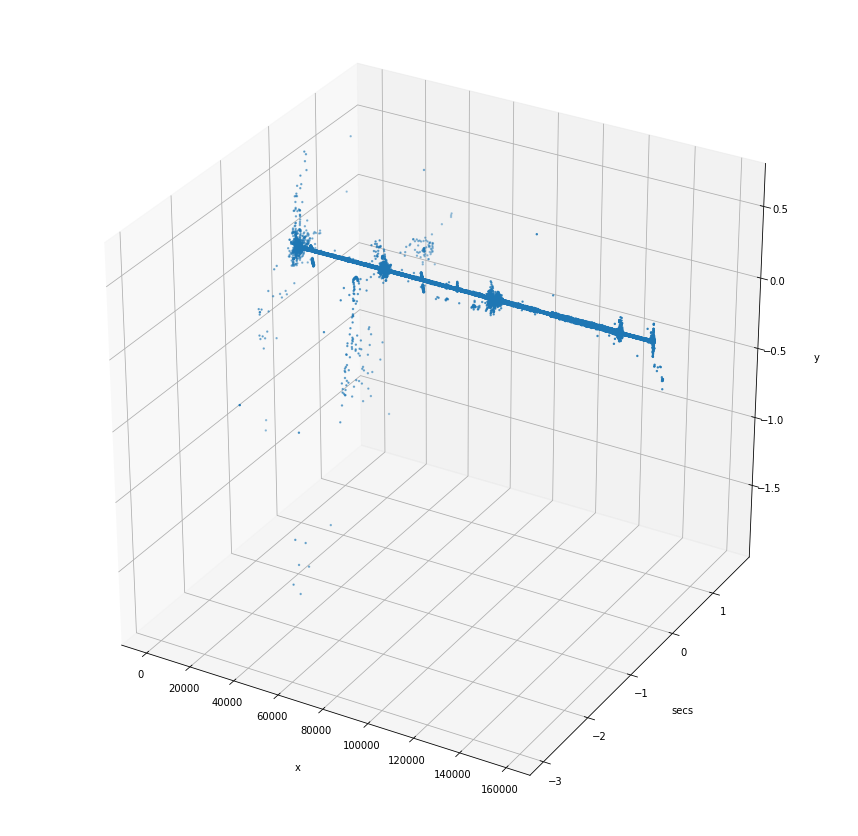

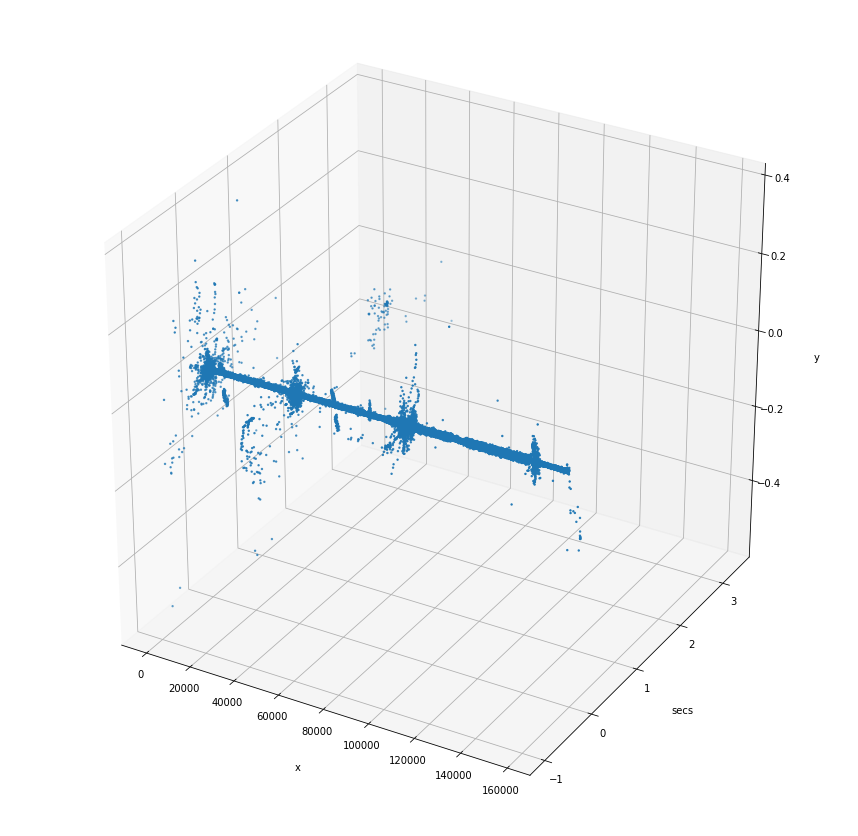

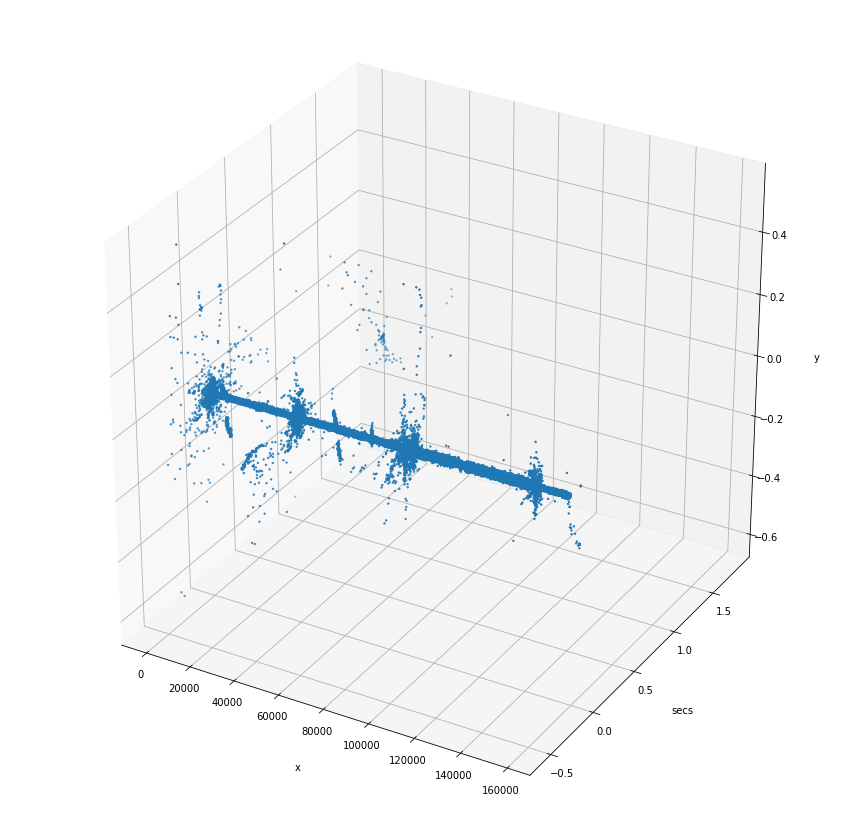

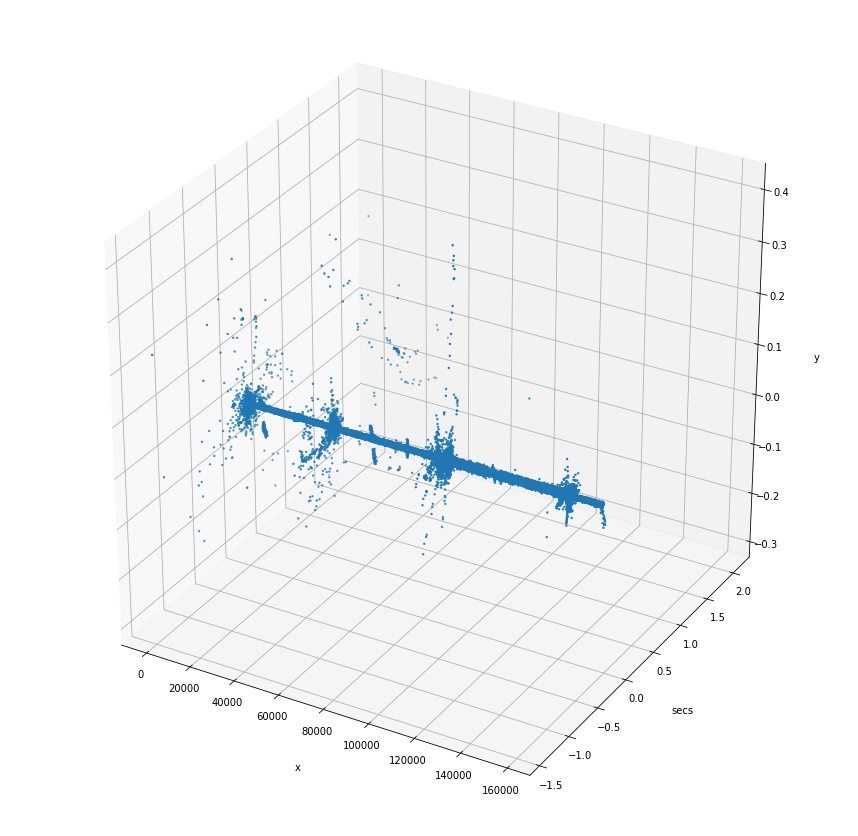

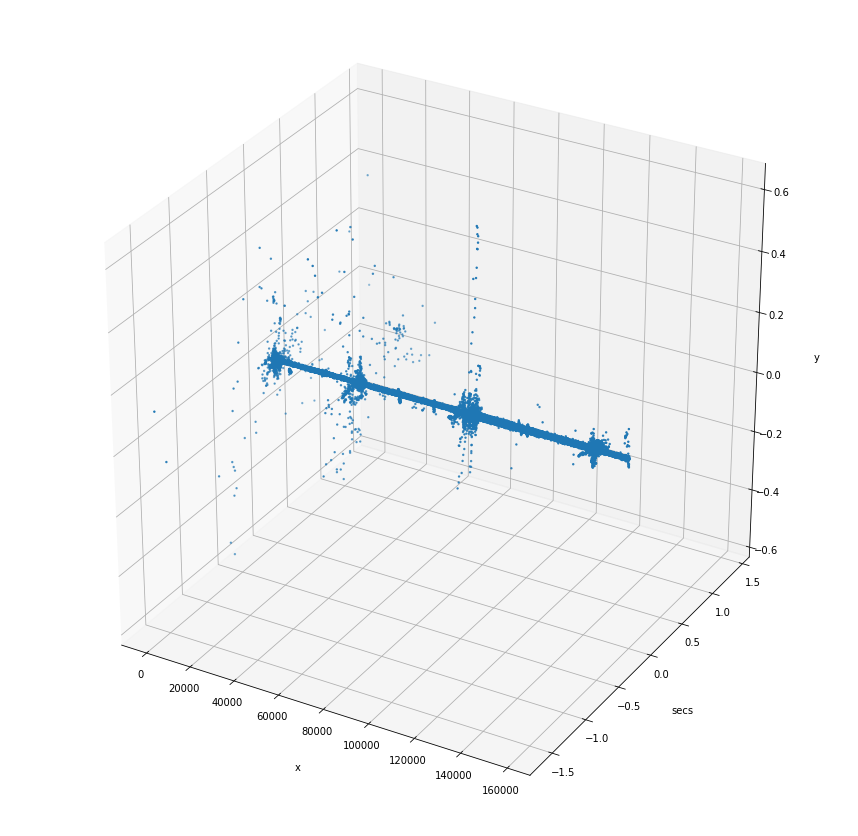

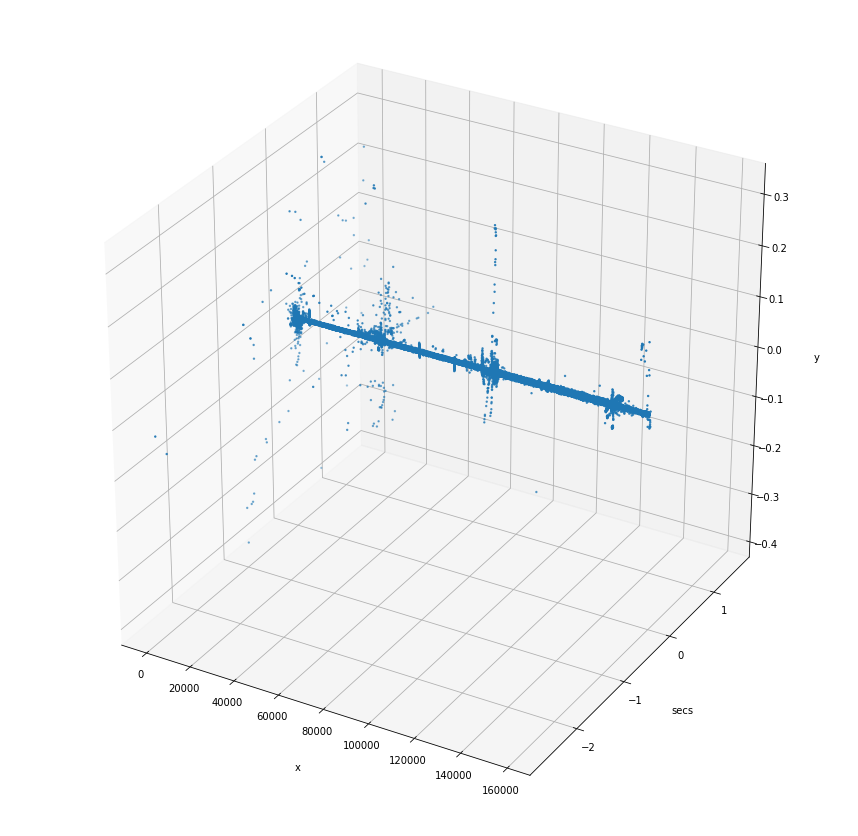

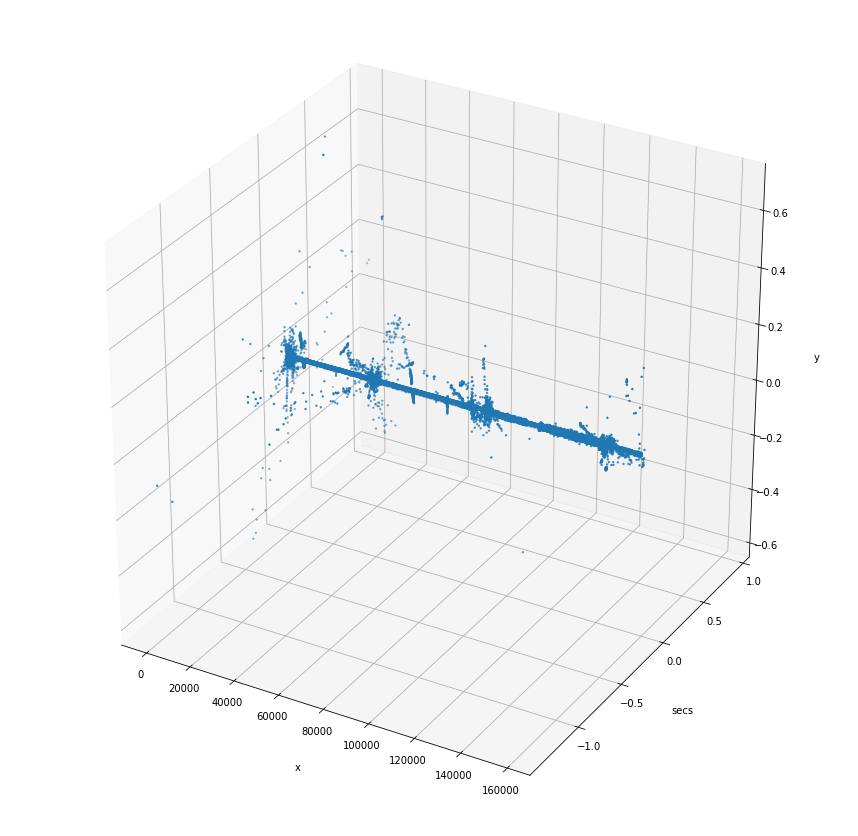

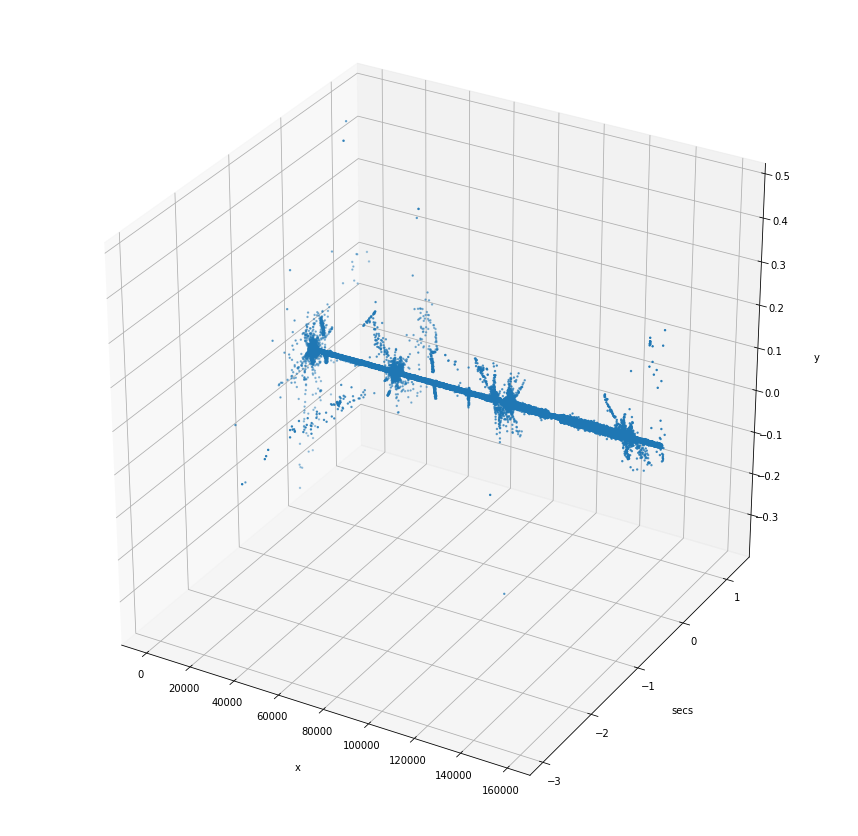

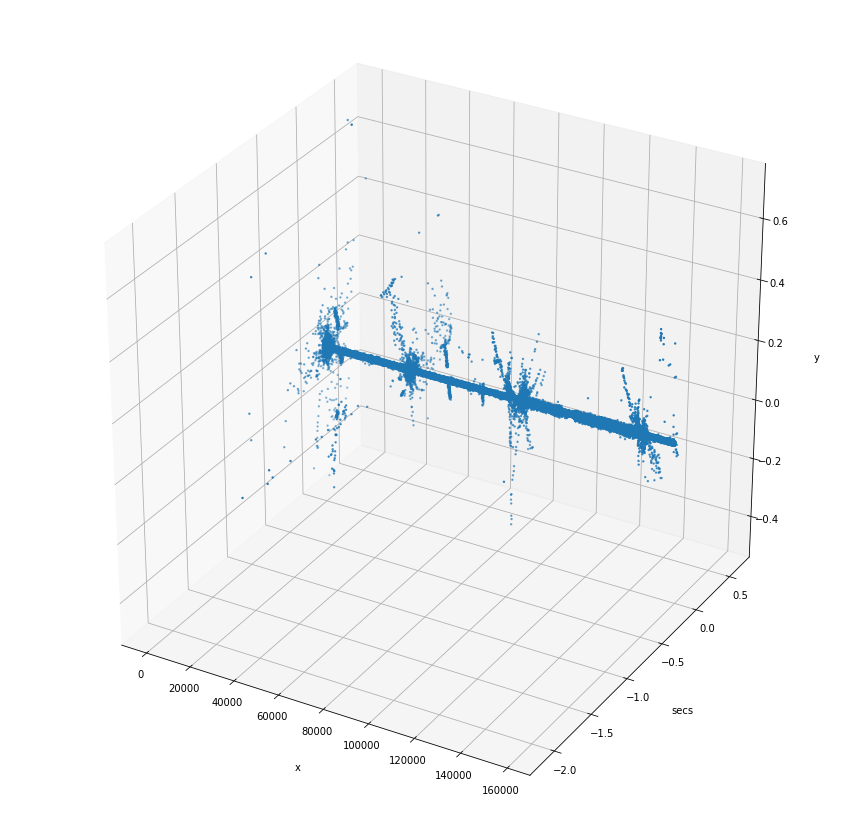

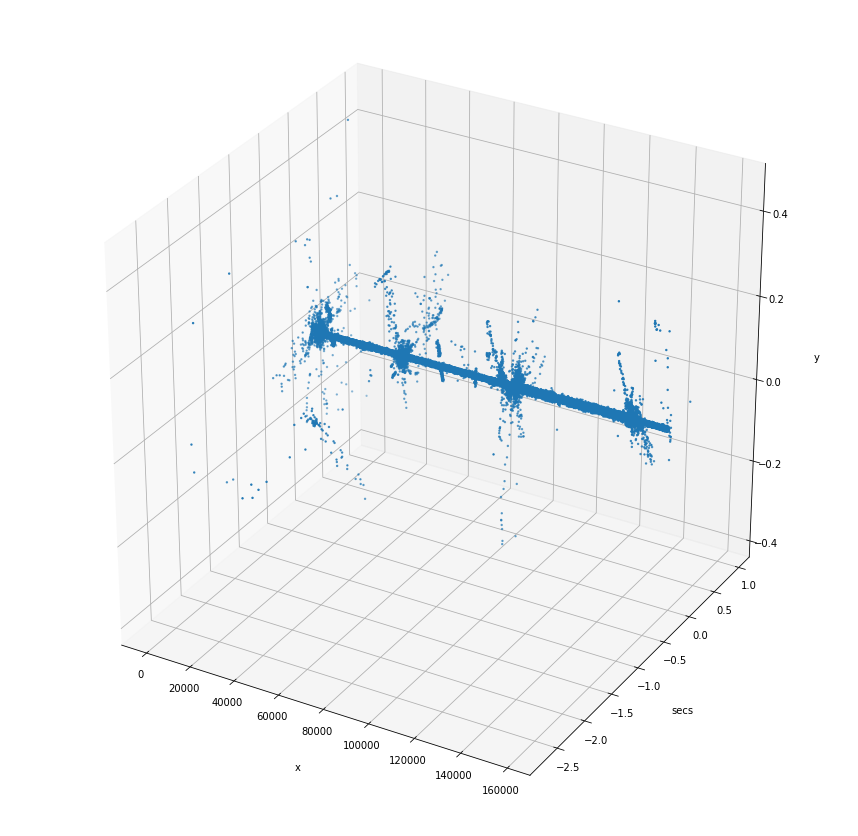

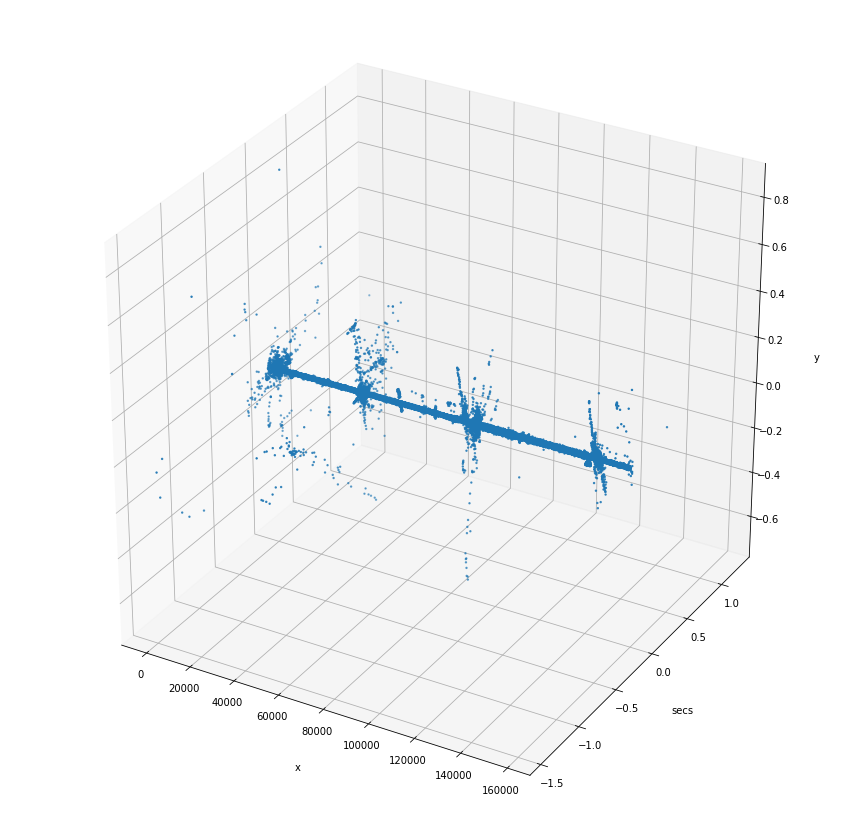

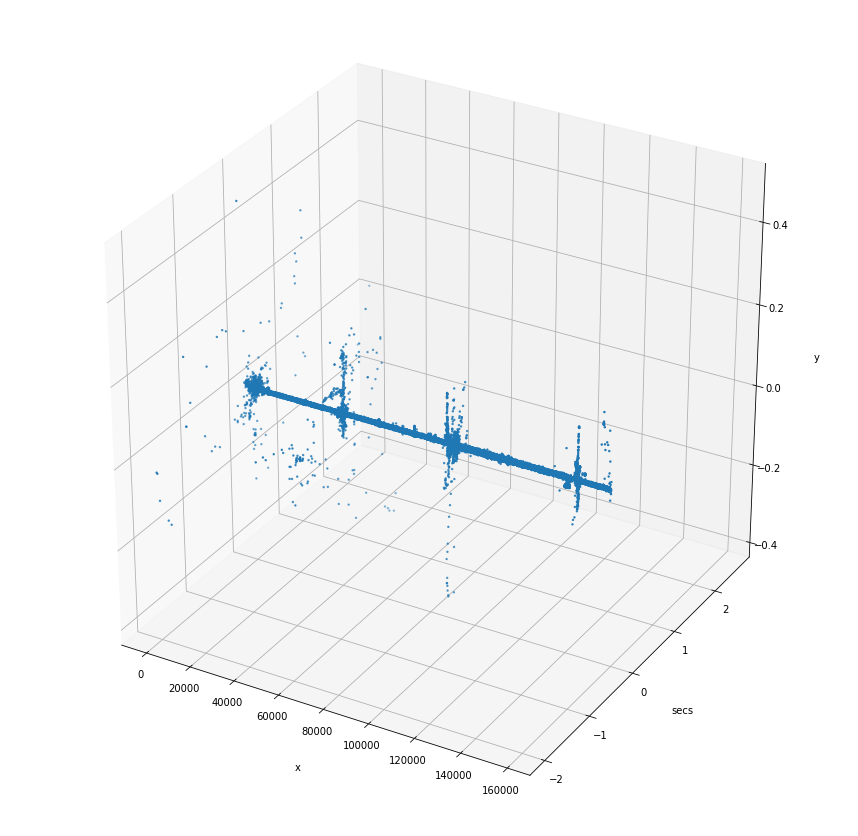

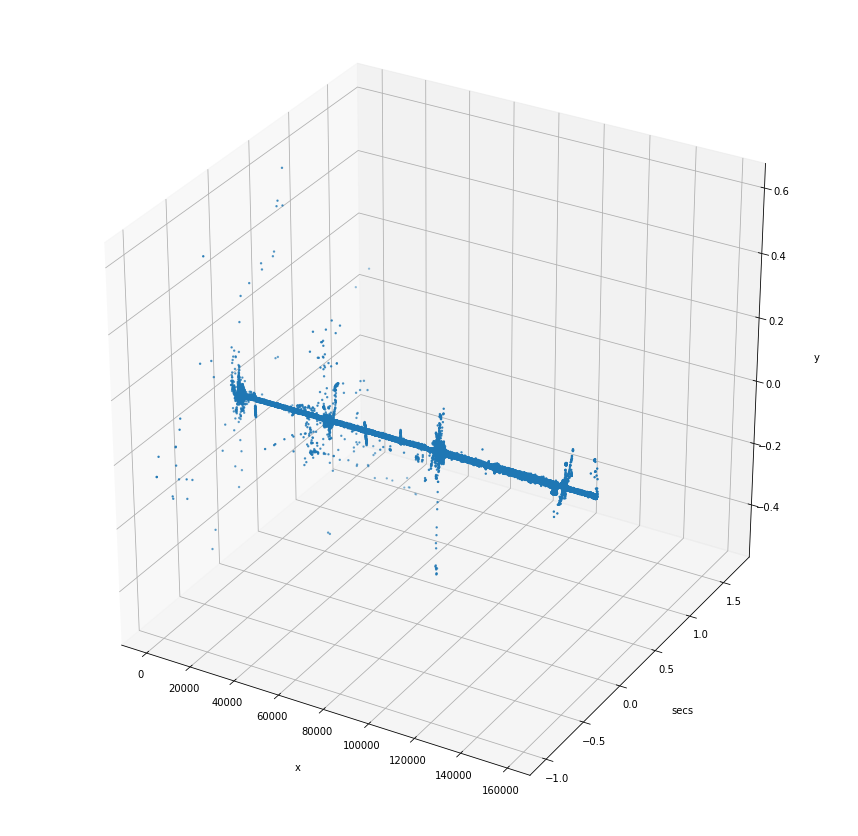

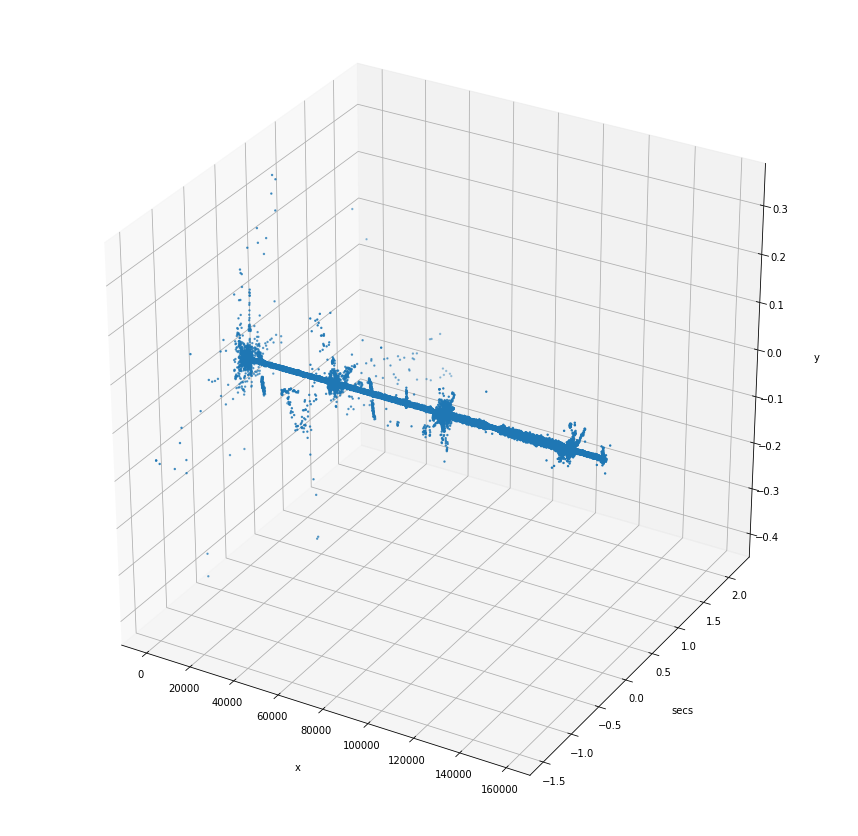

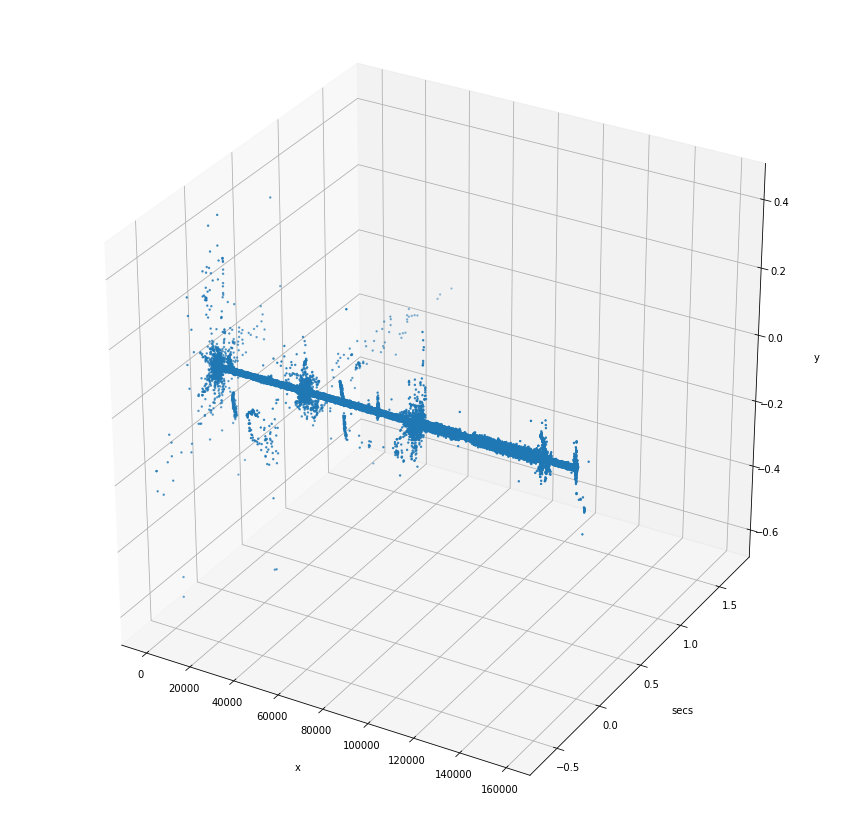

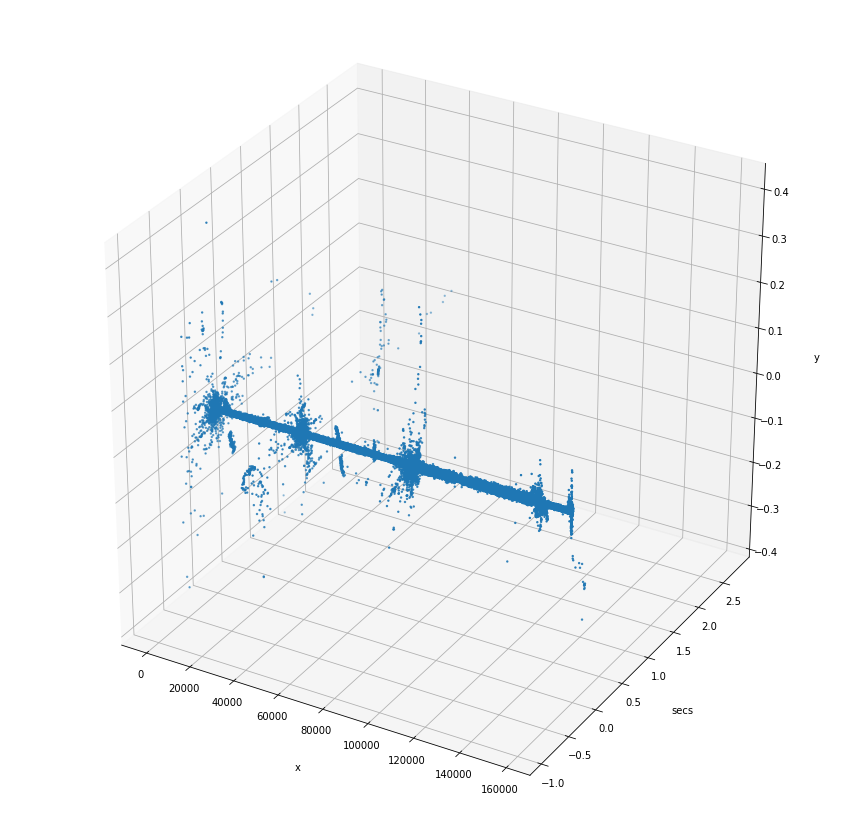

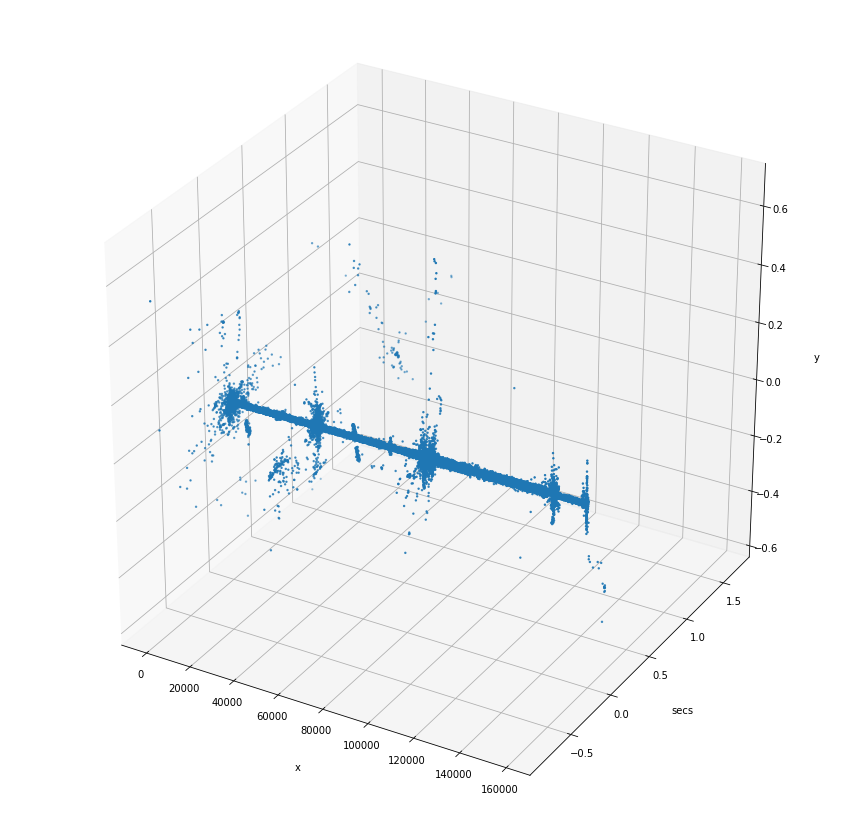

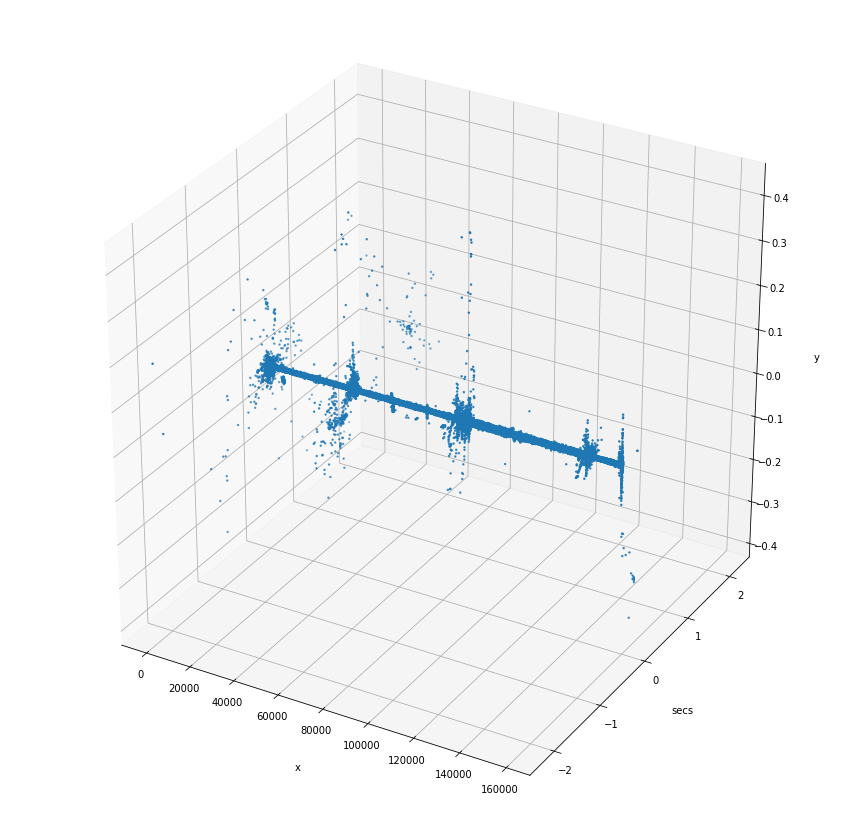

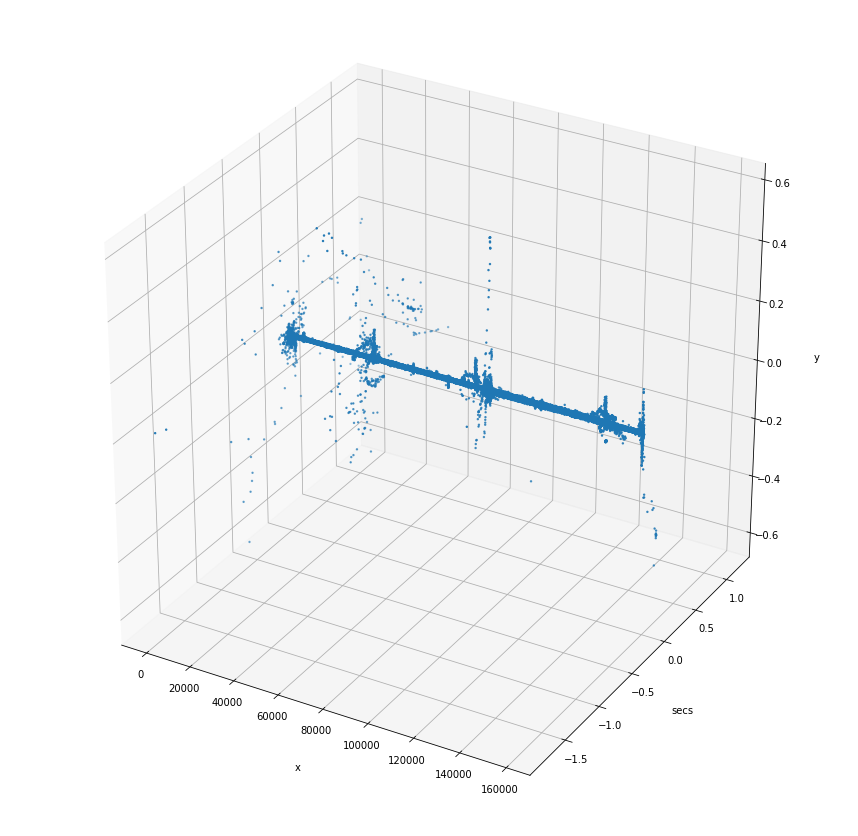

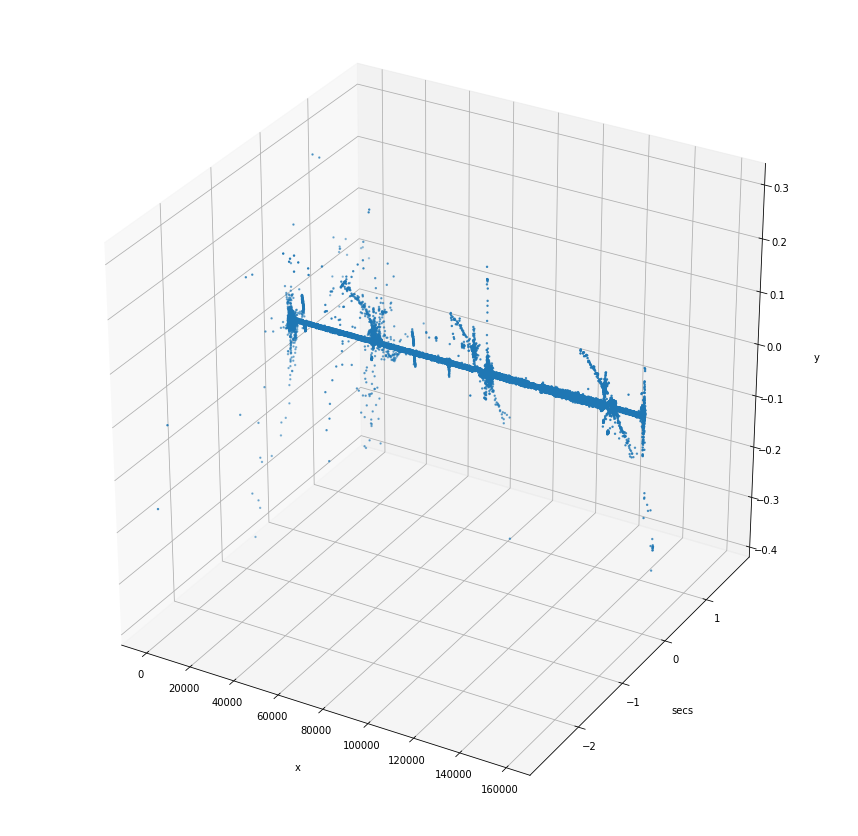

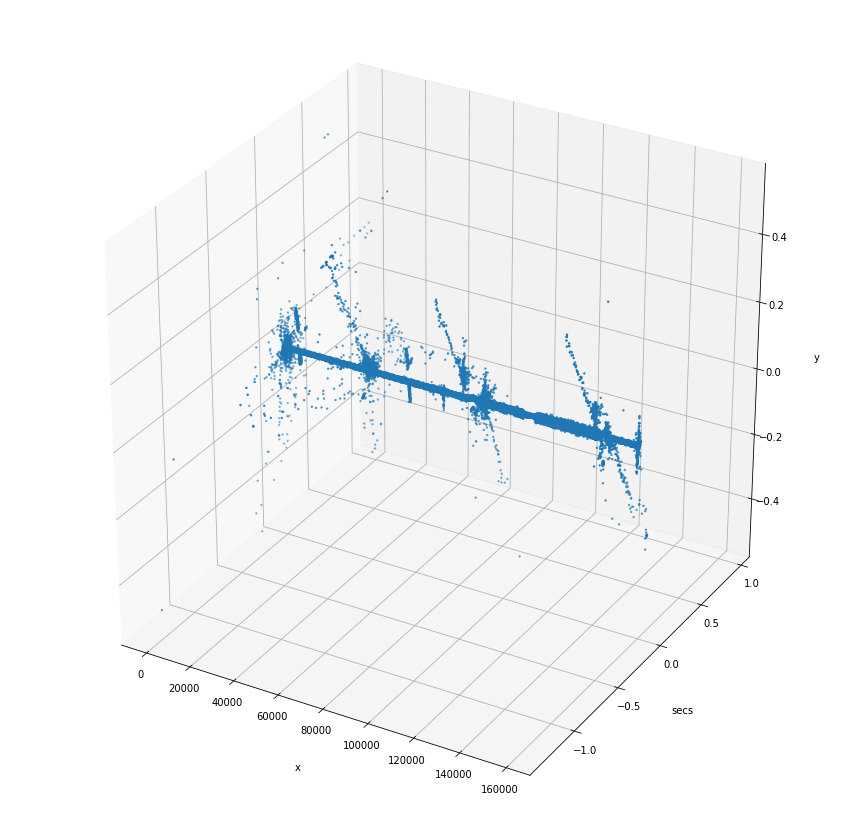

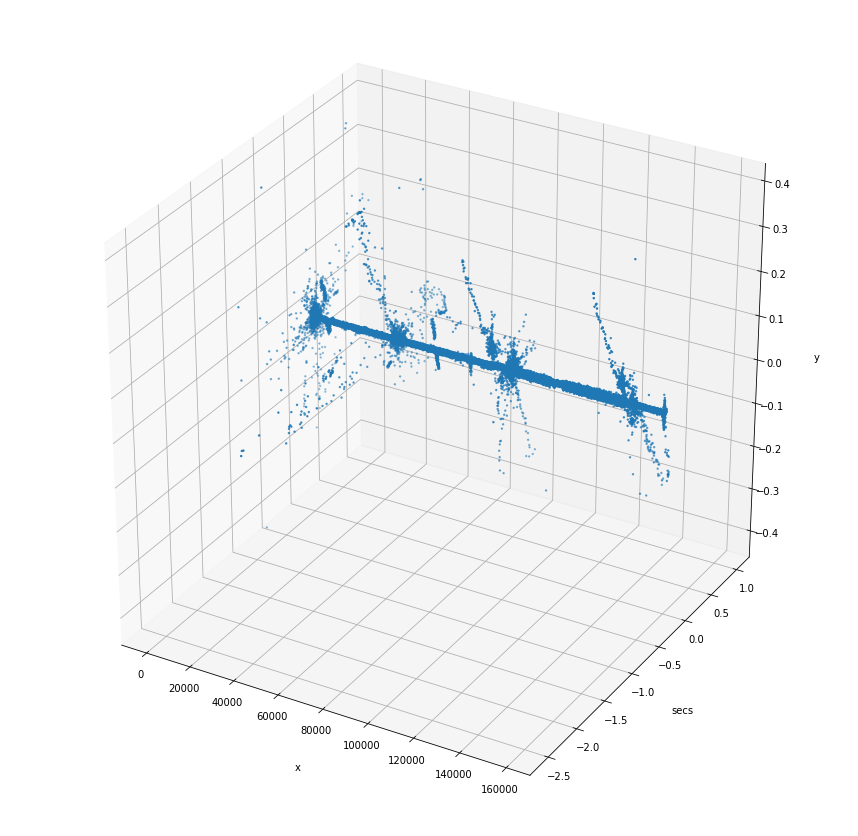

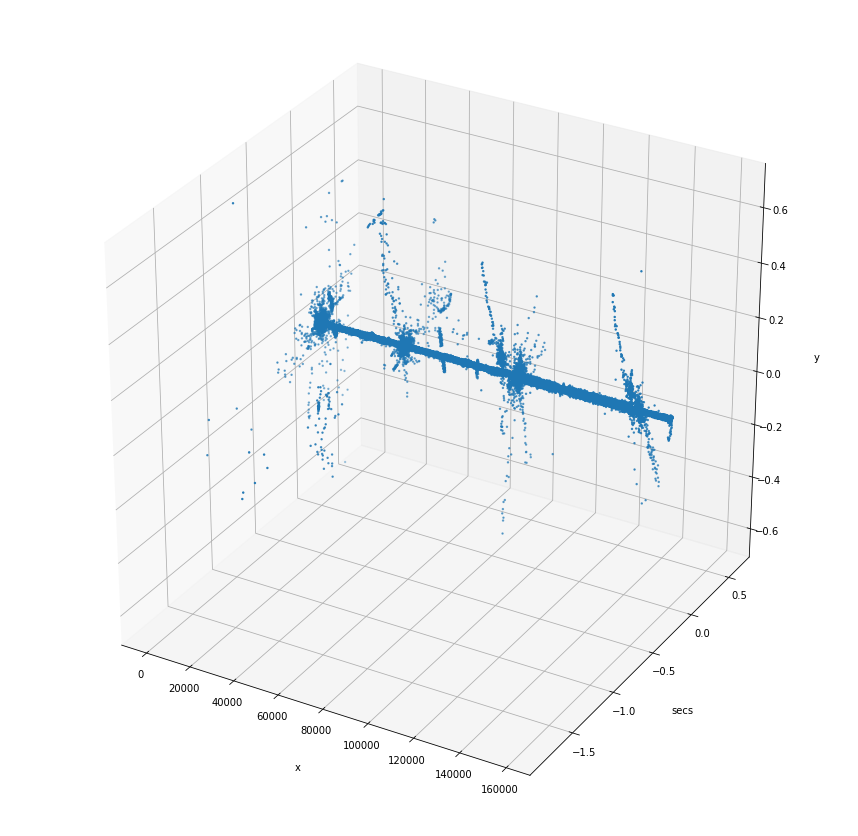

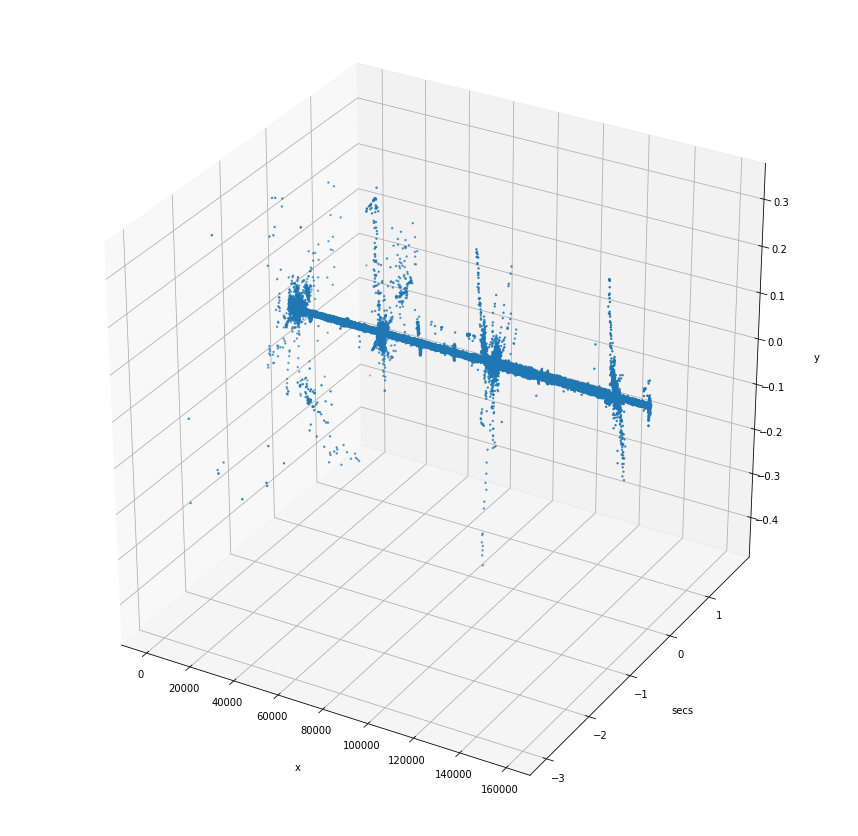

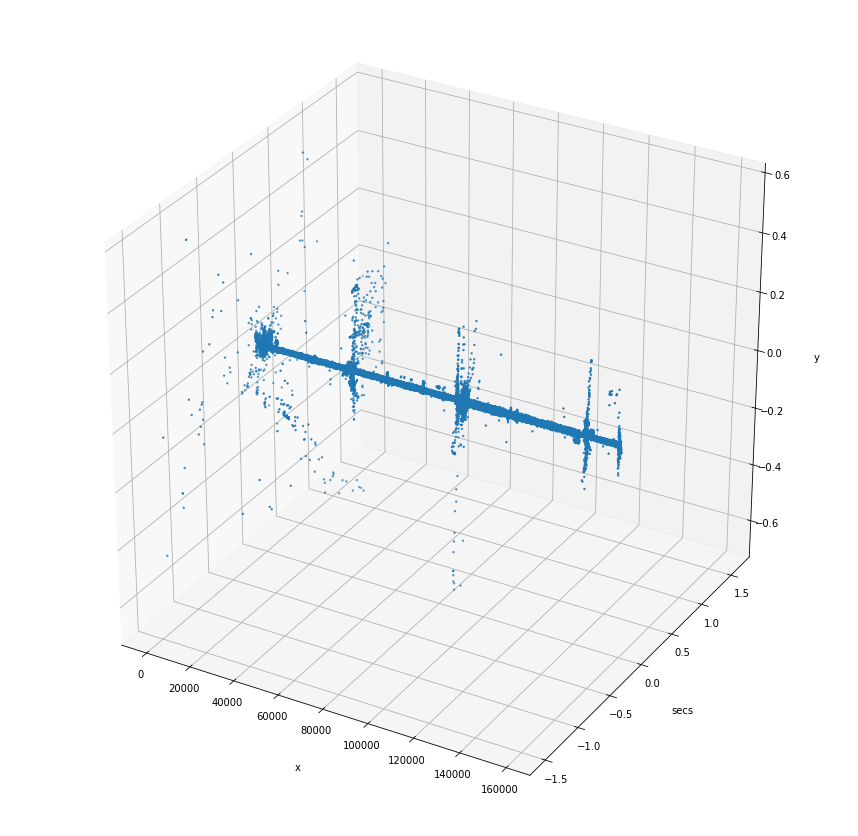

In [103]:
for i in range(31):
    make_3d_scatter(cbpm_hard_xy[i].secs, cbpm_hard_xy[i].x, cbpm_hard_xy[i].y)

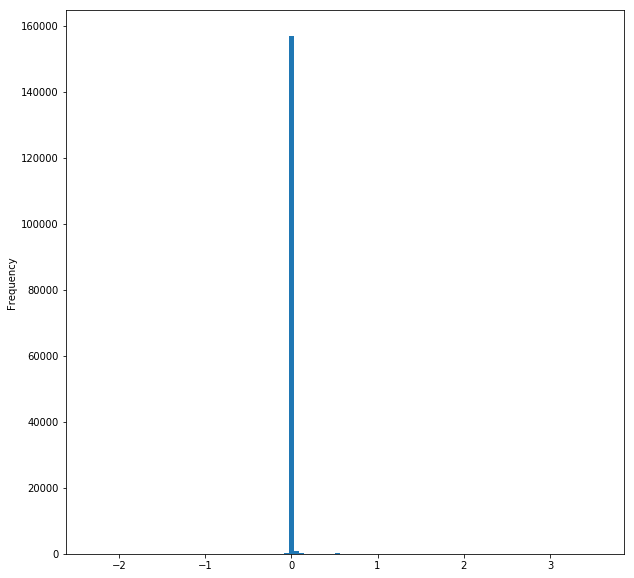

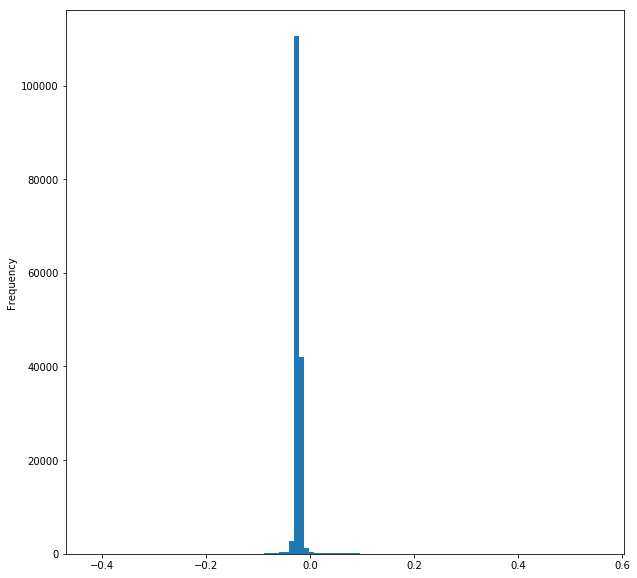

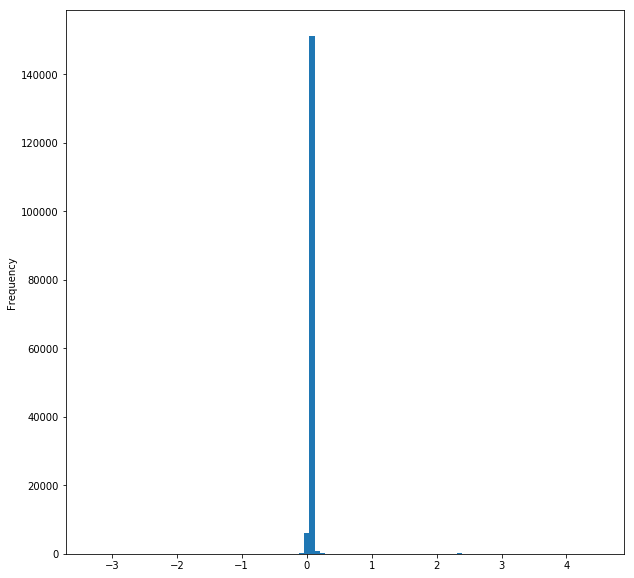

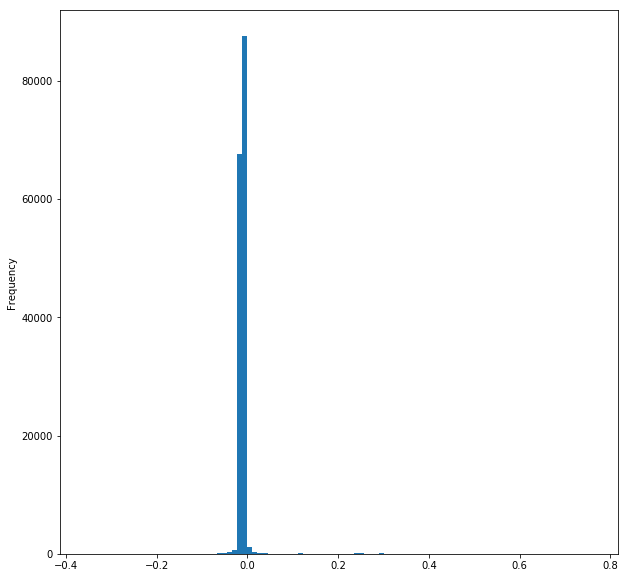

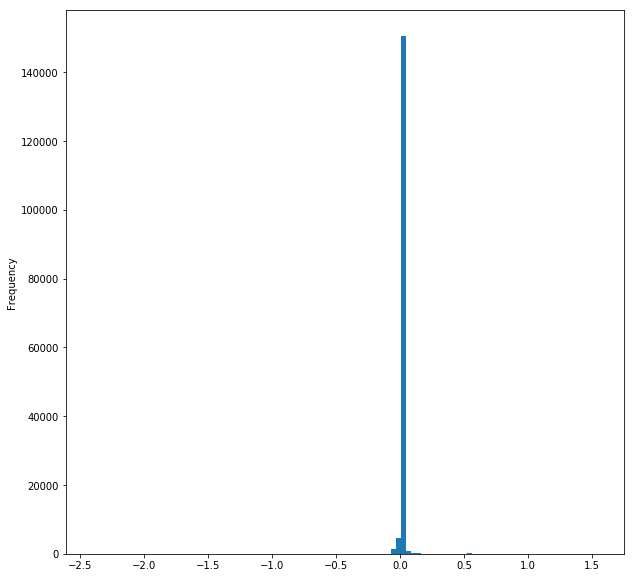

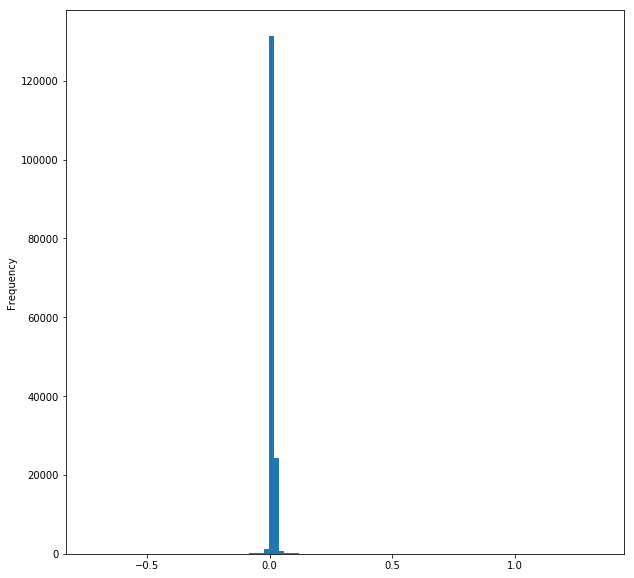

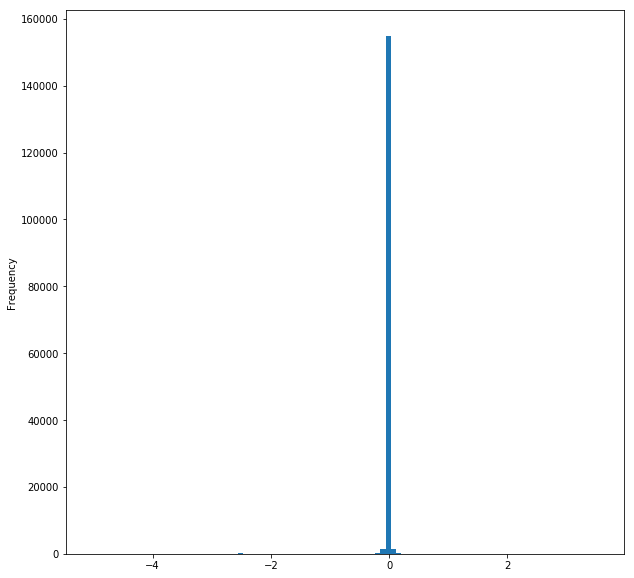

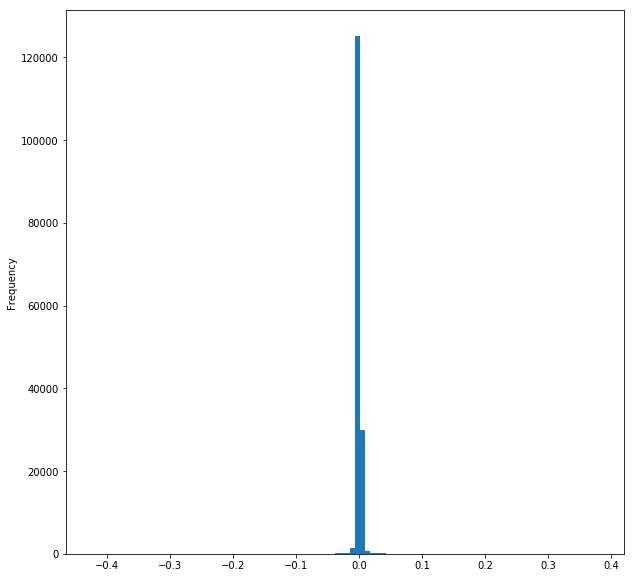

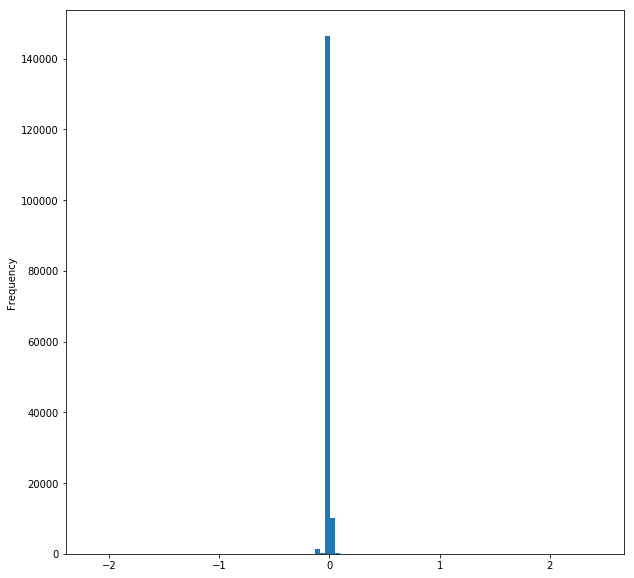

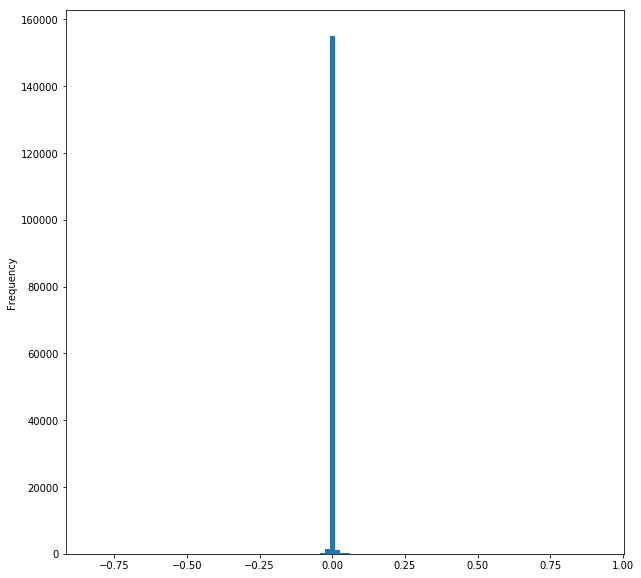

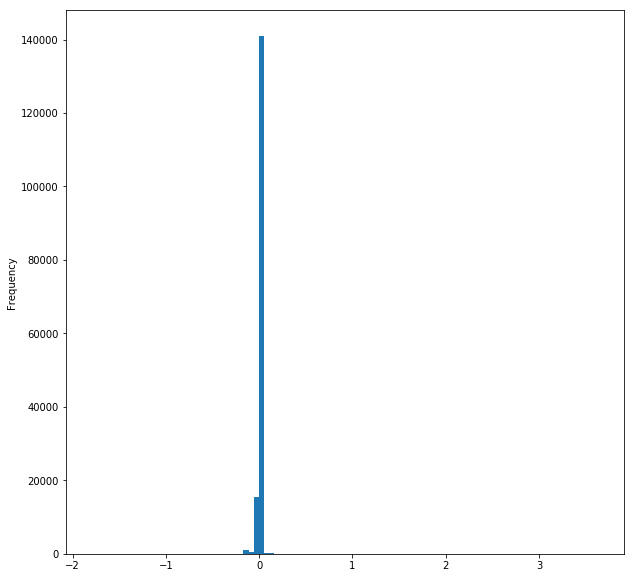

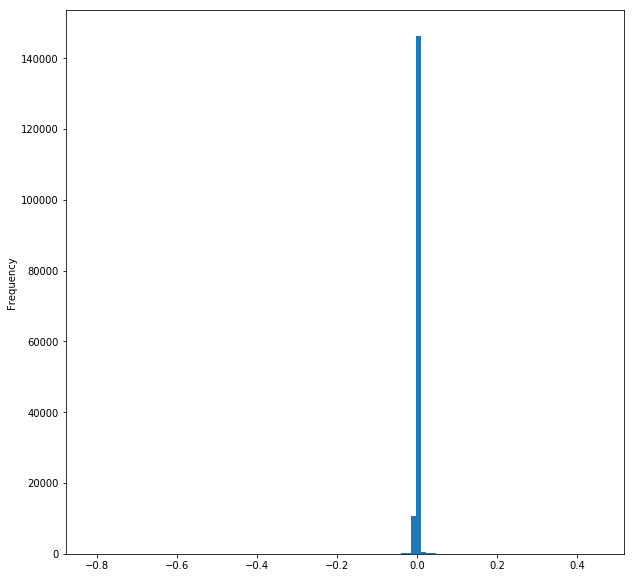

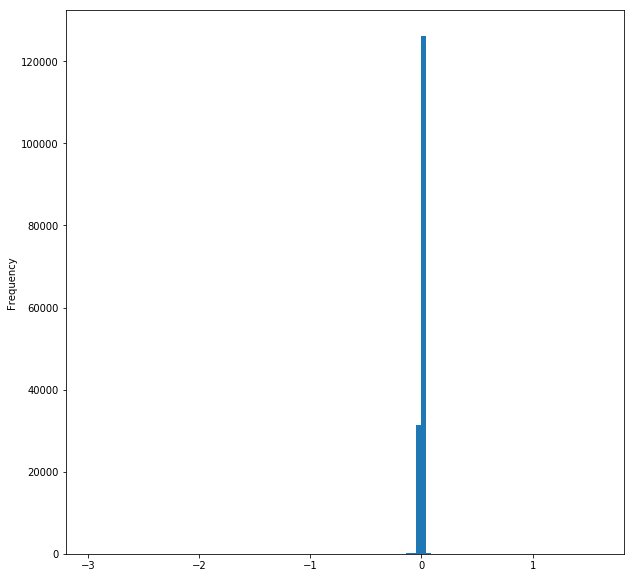

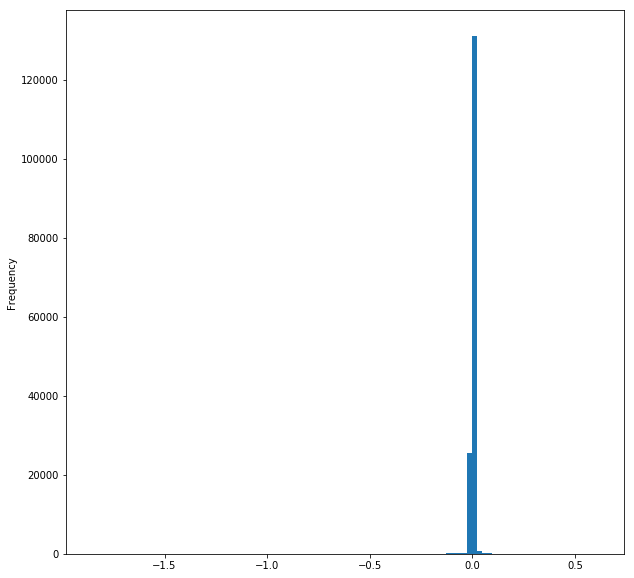

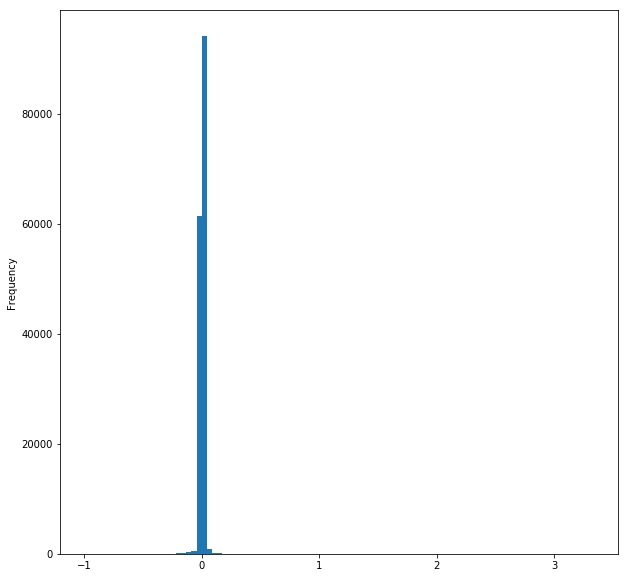

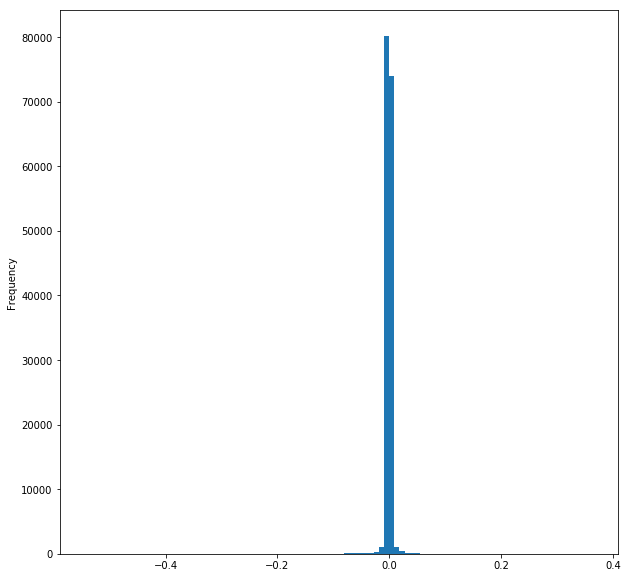

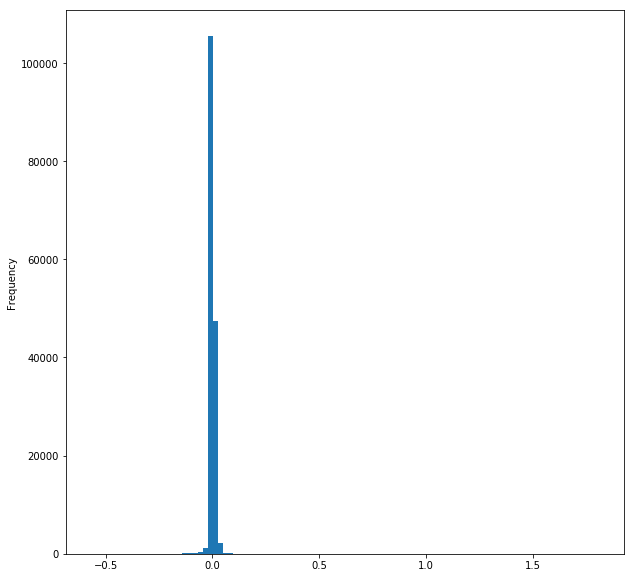

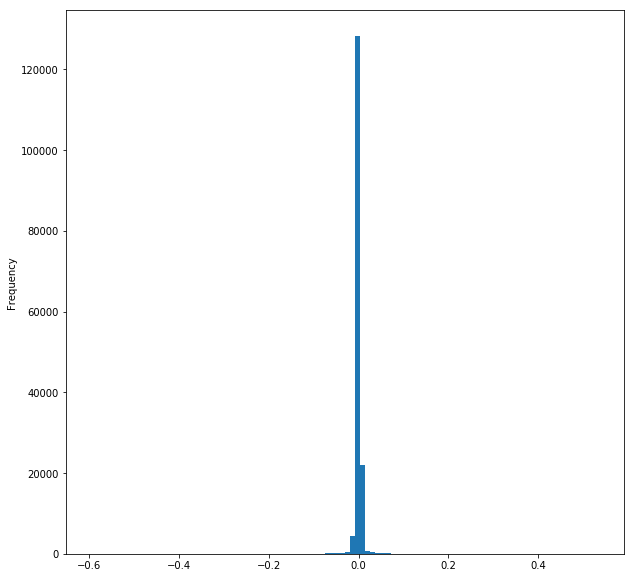

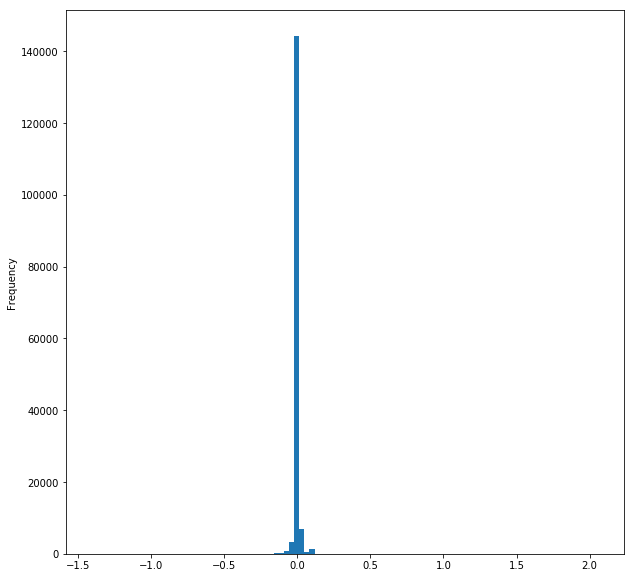

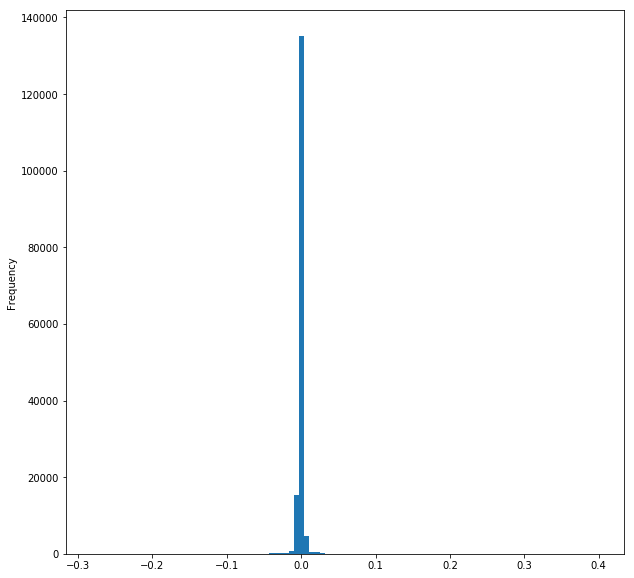

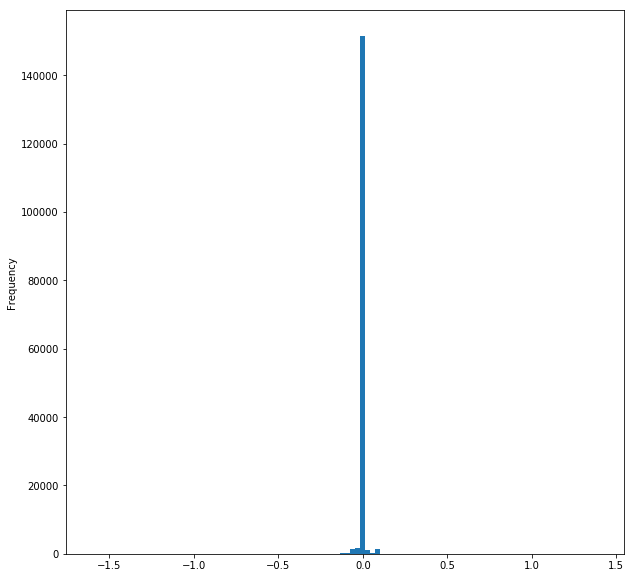

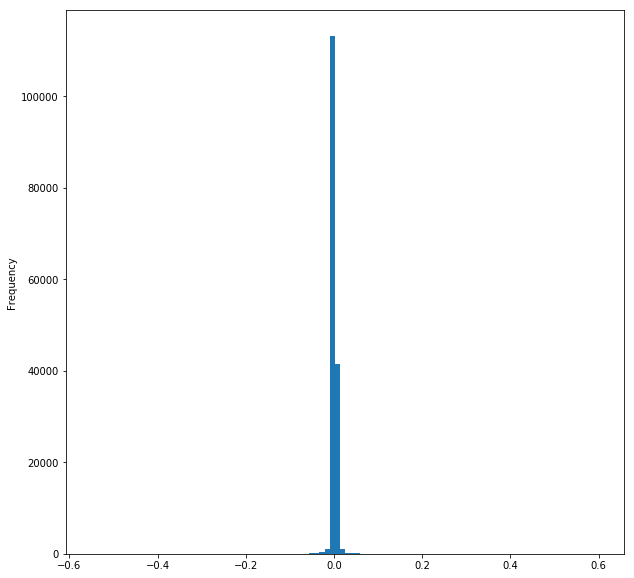

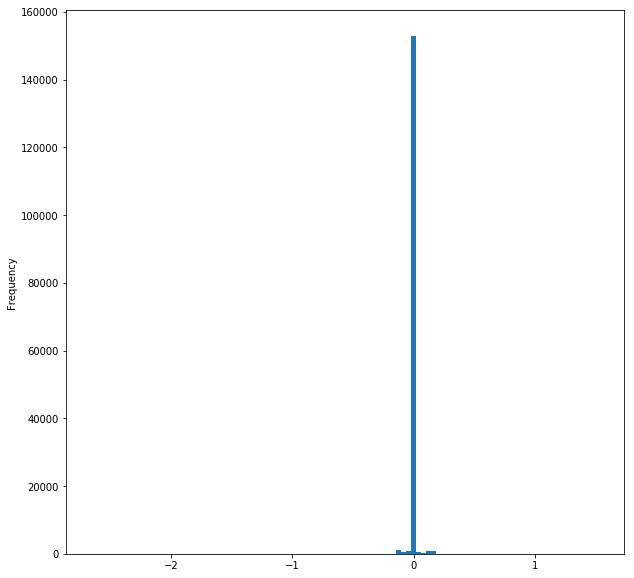

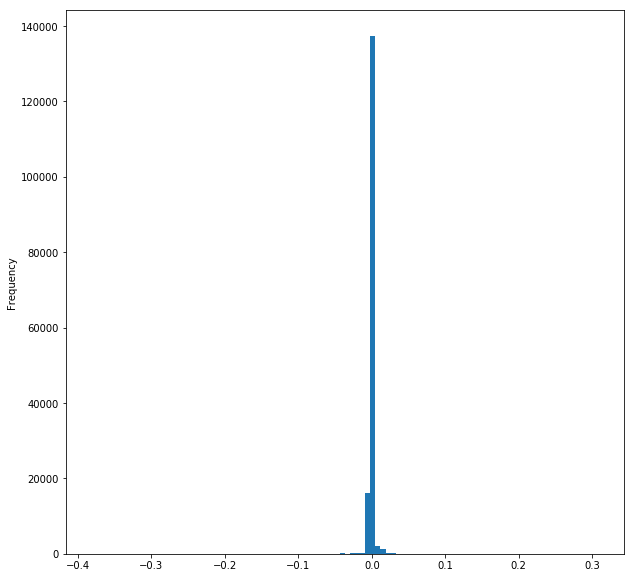

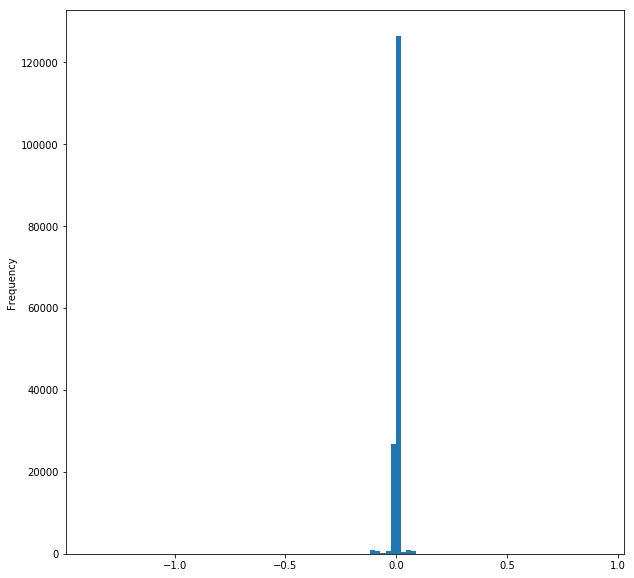

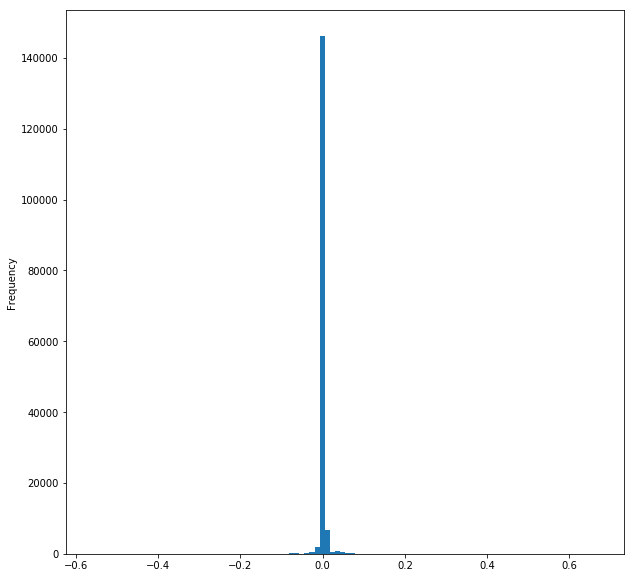

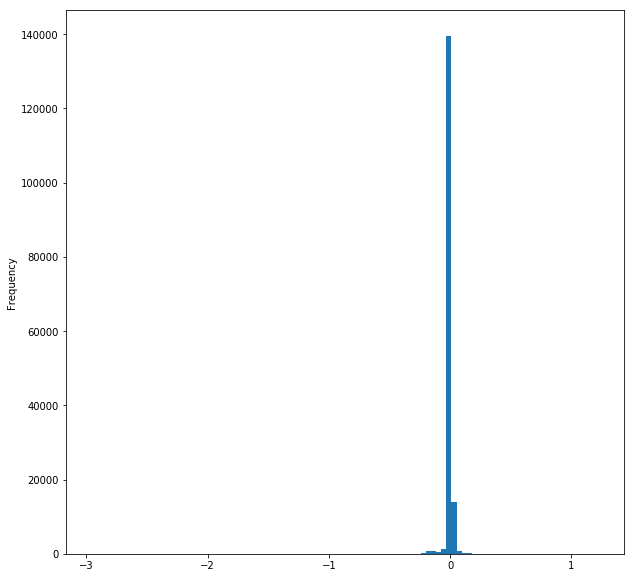

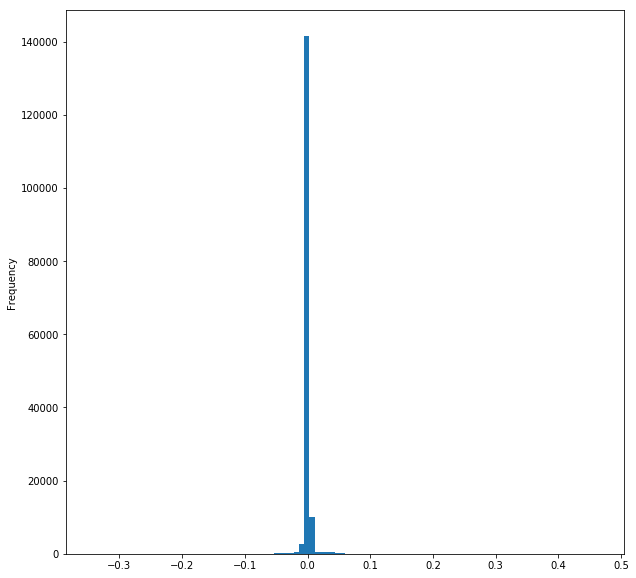

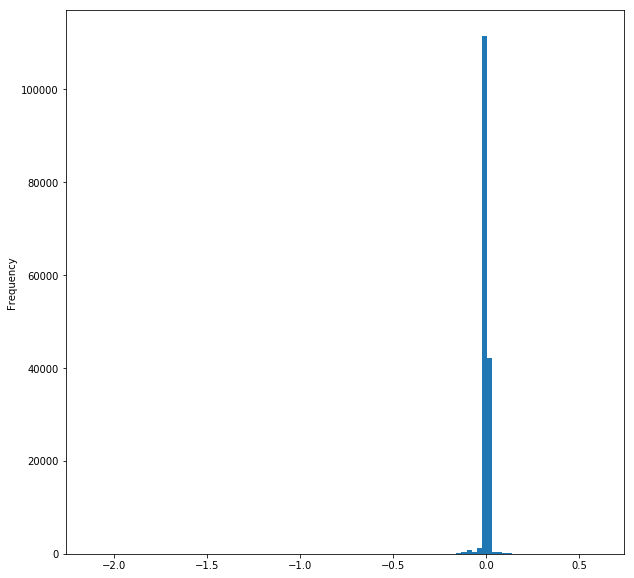

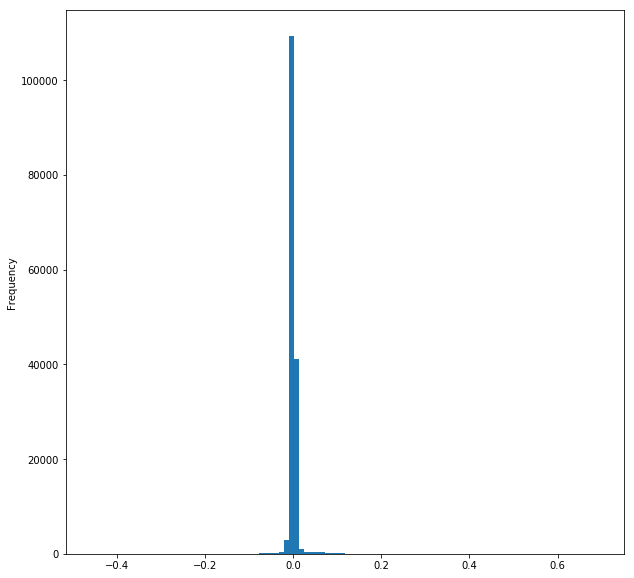

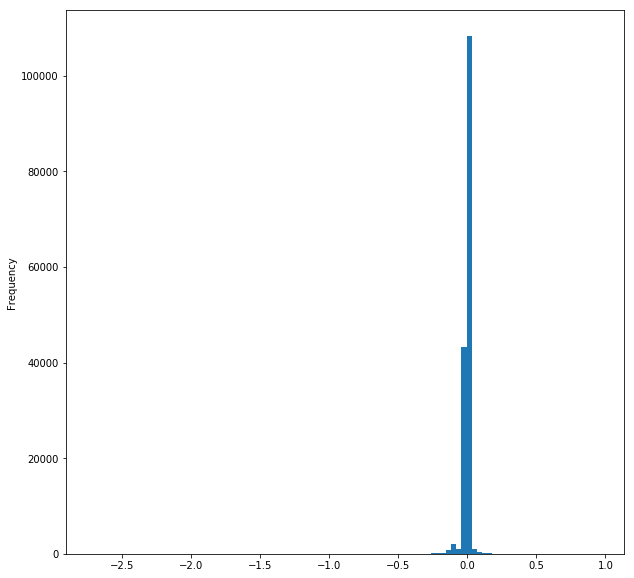

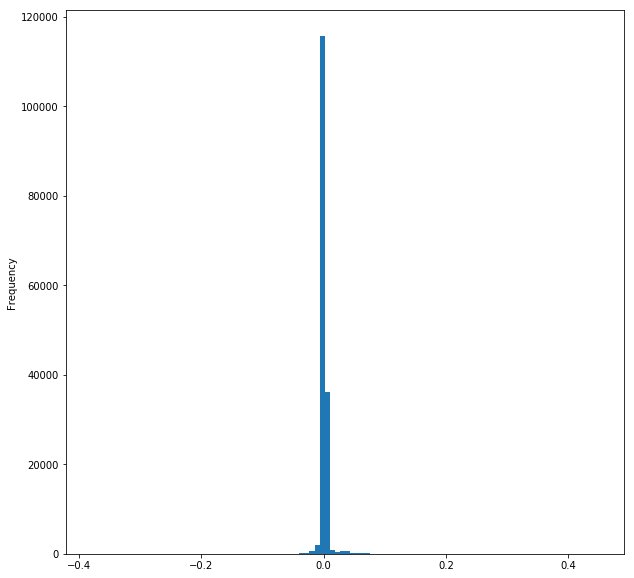

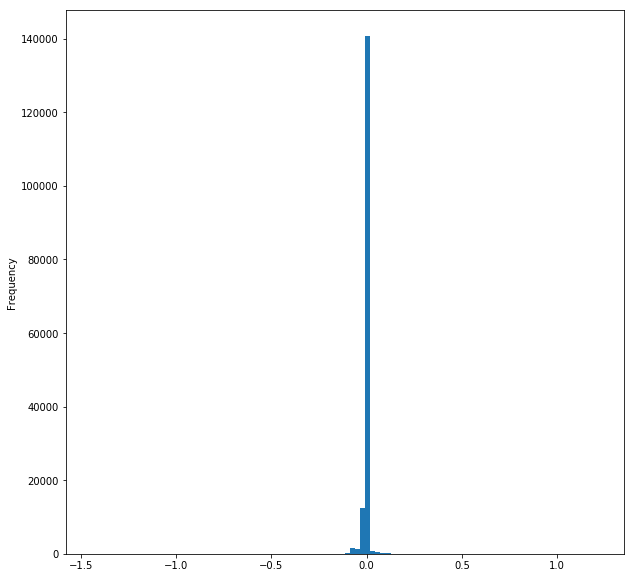

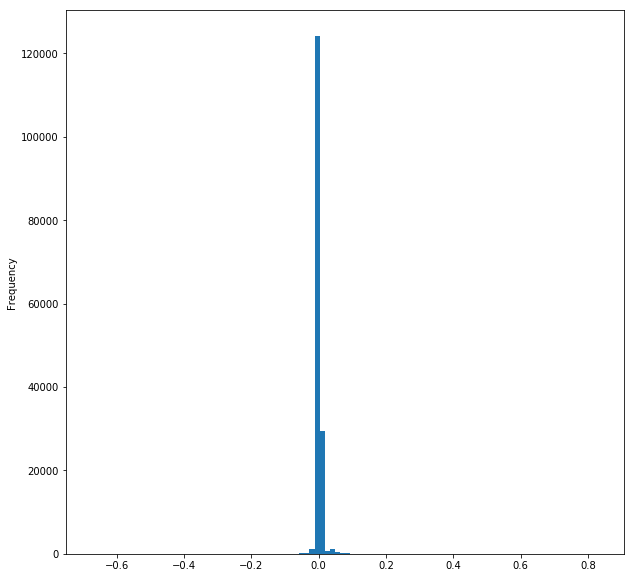

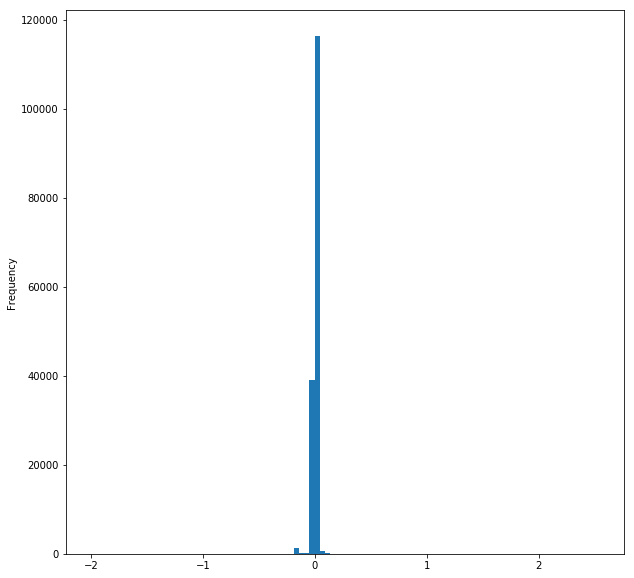

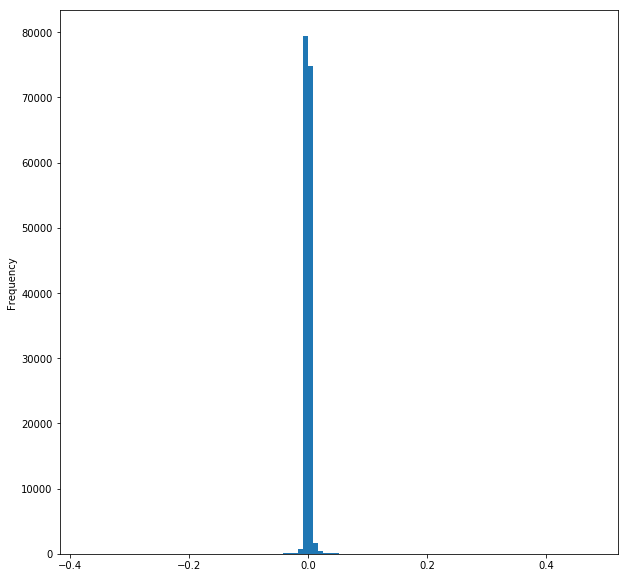

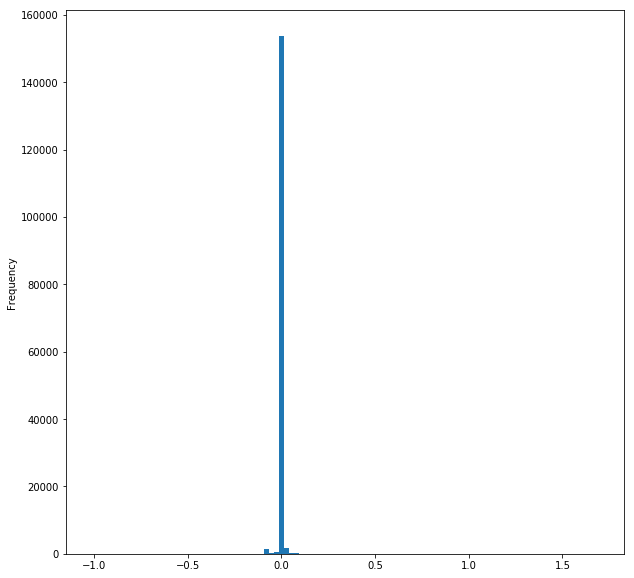

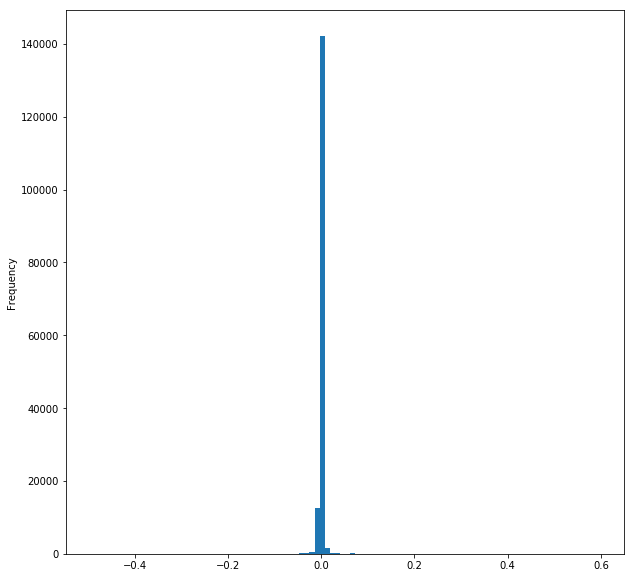

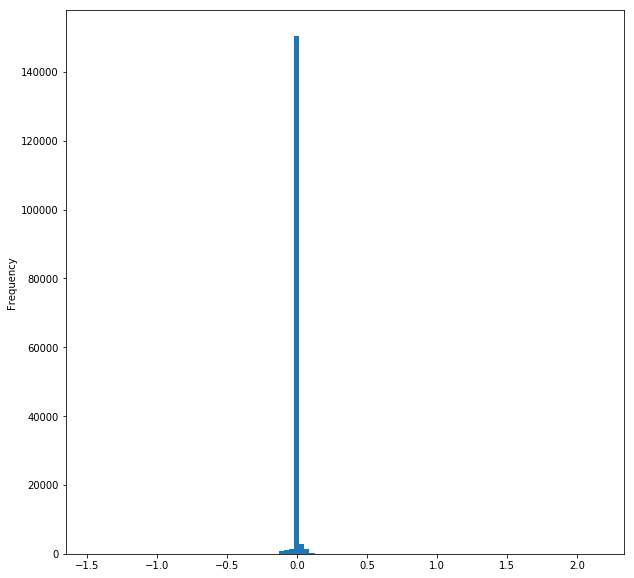

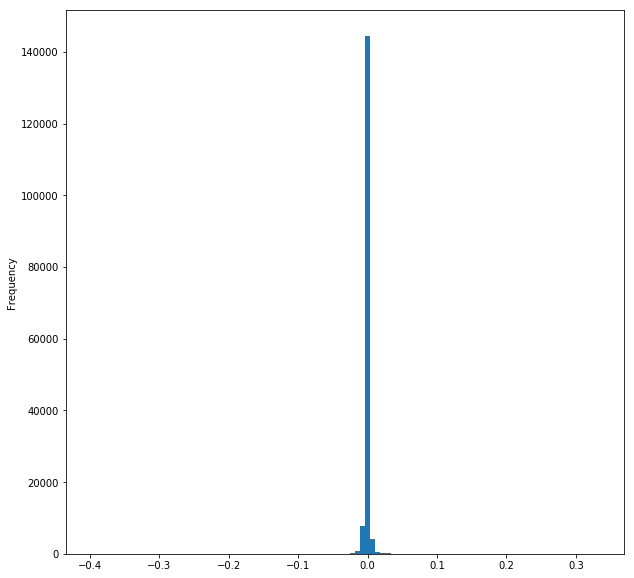

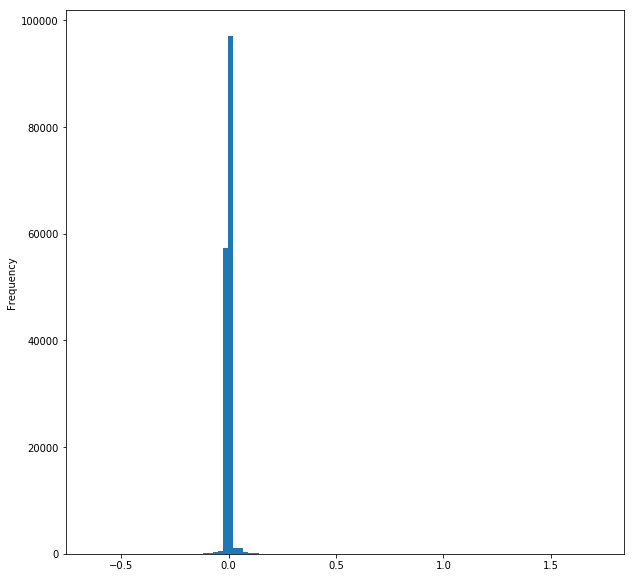

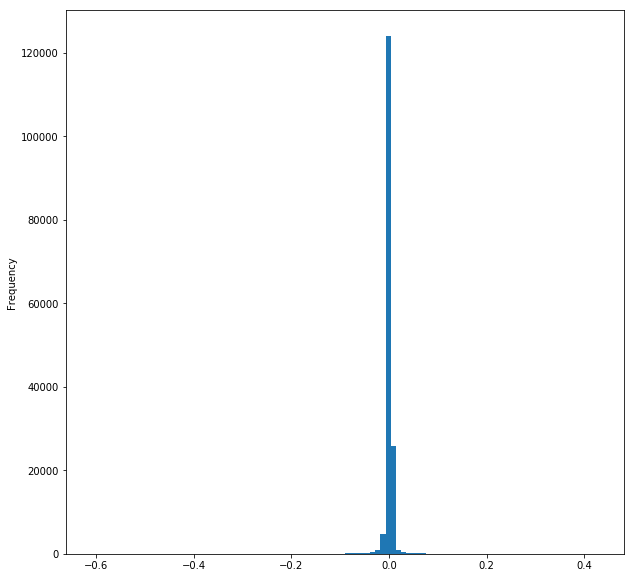

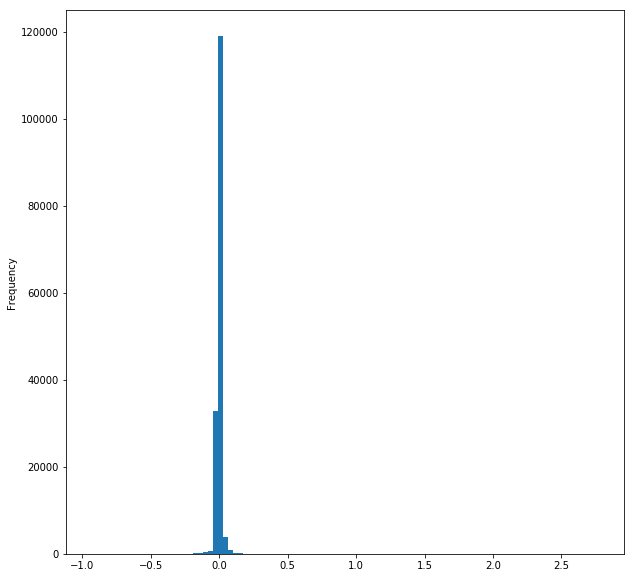

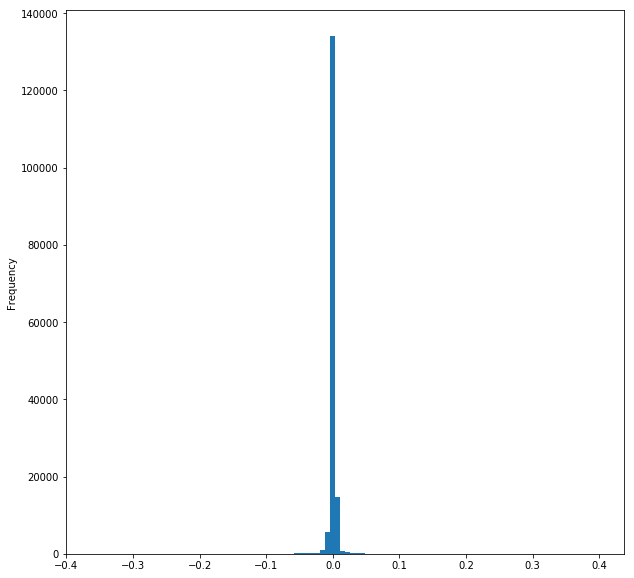

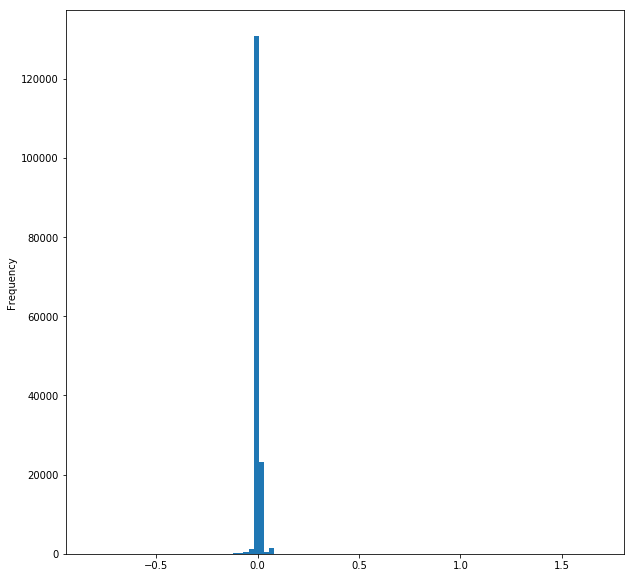

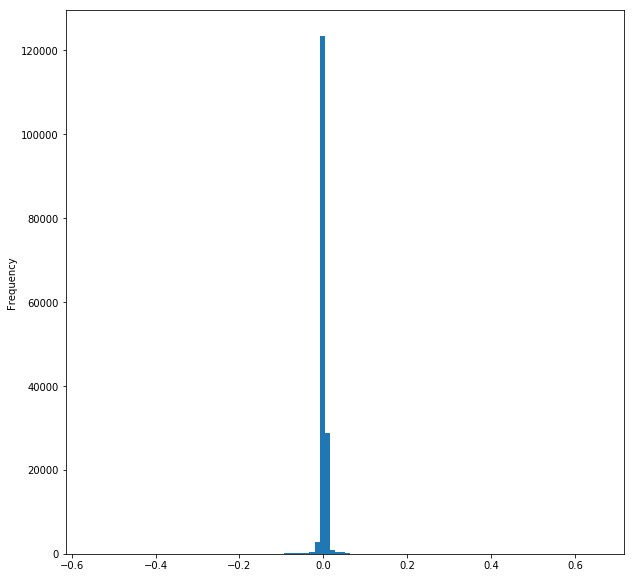

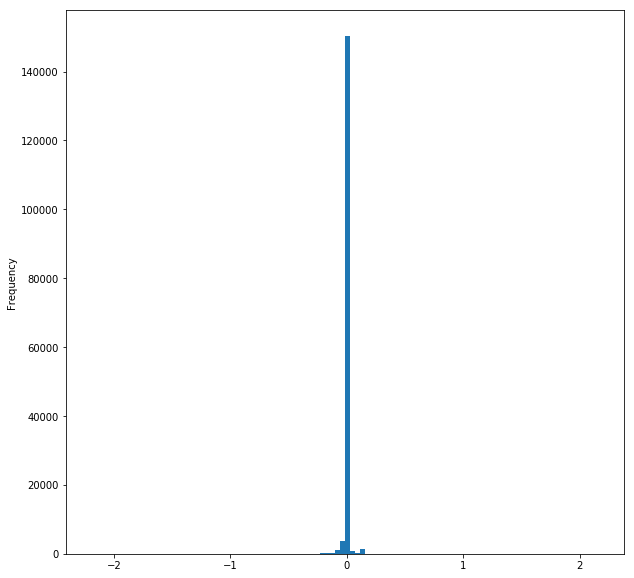

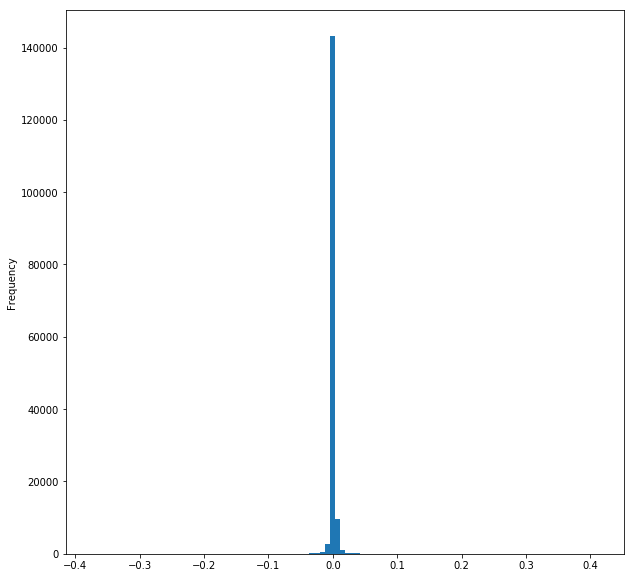

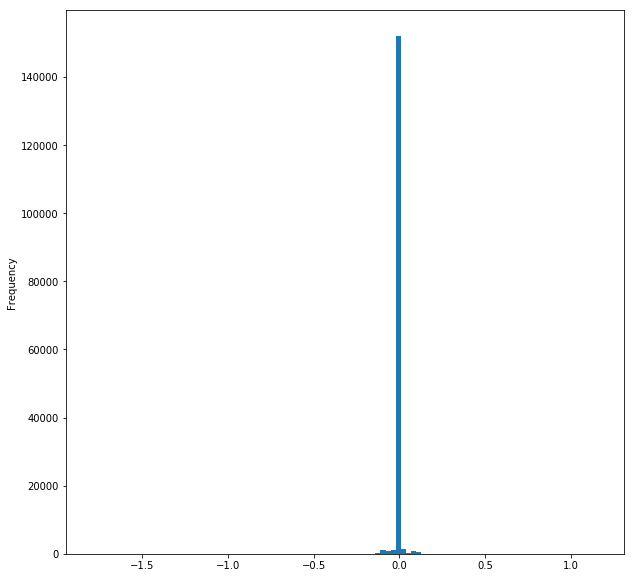

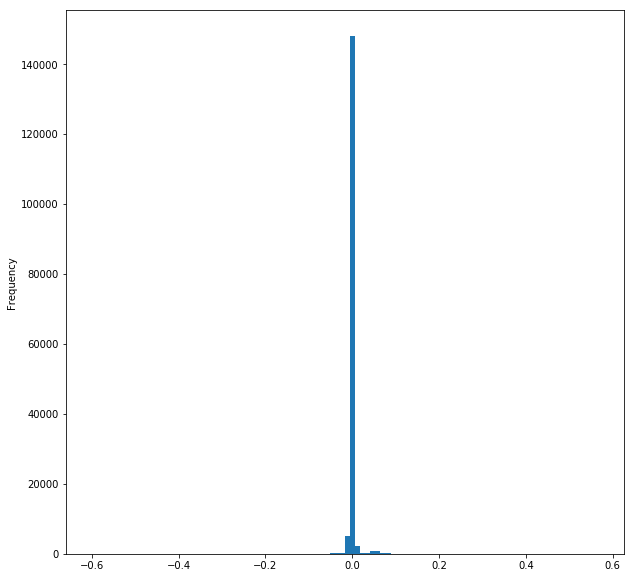

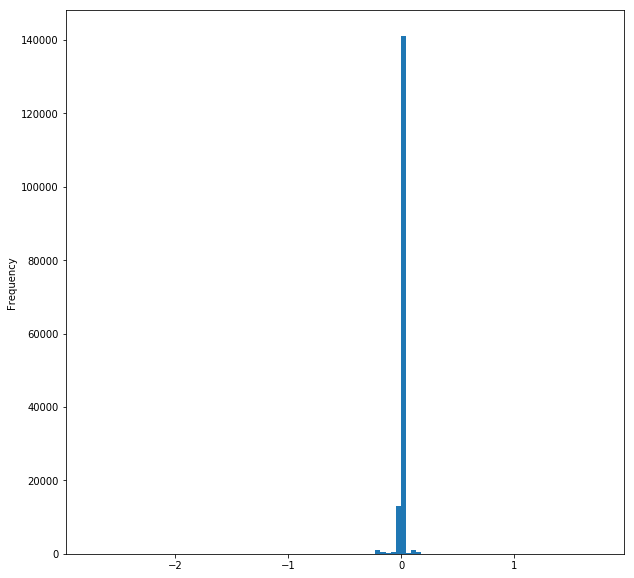

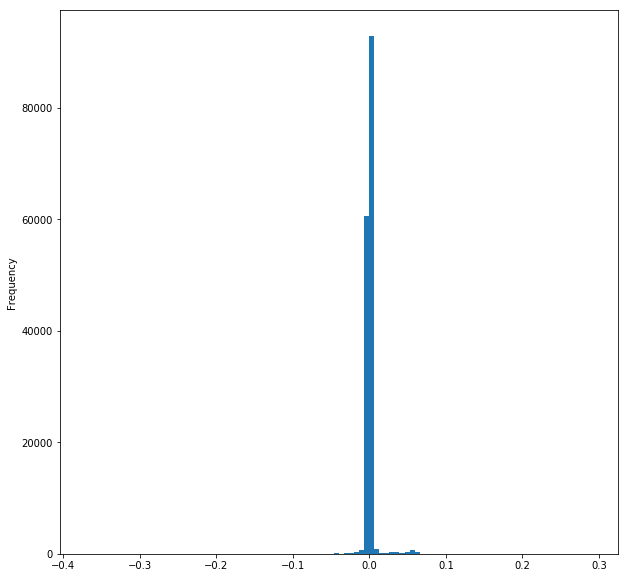

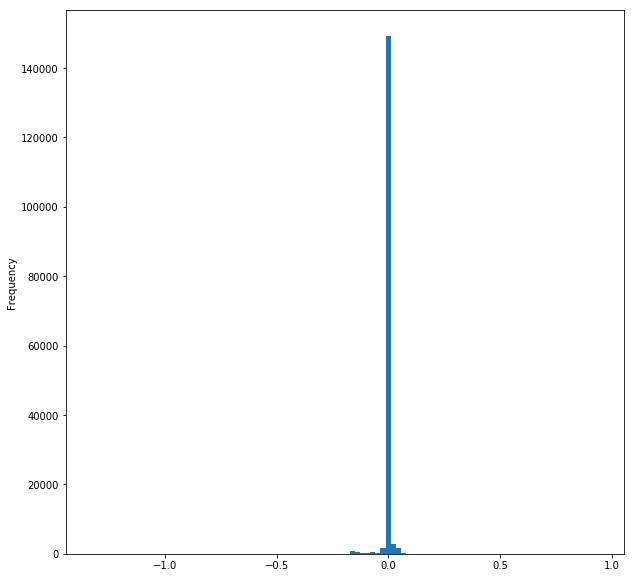

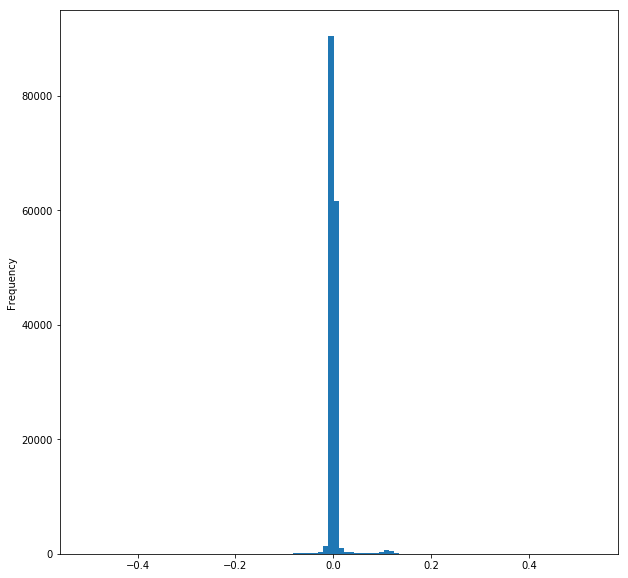

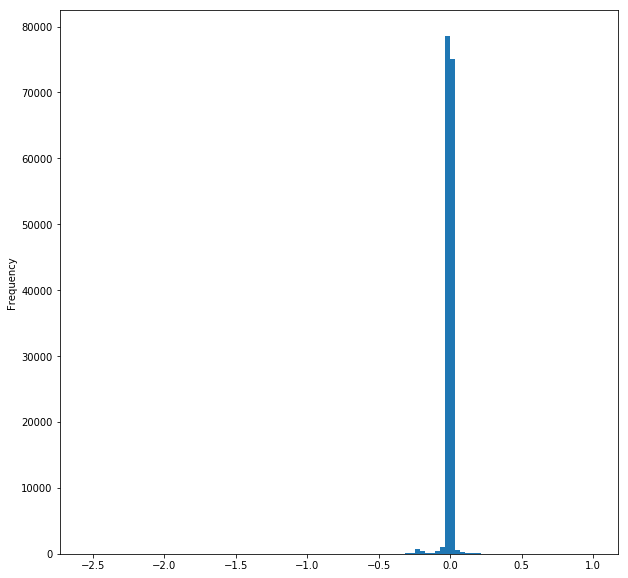

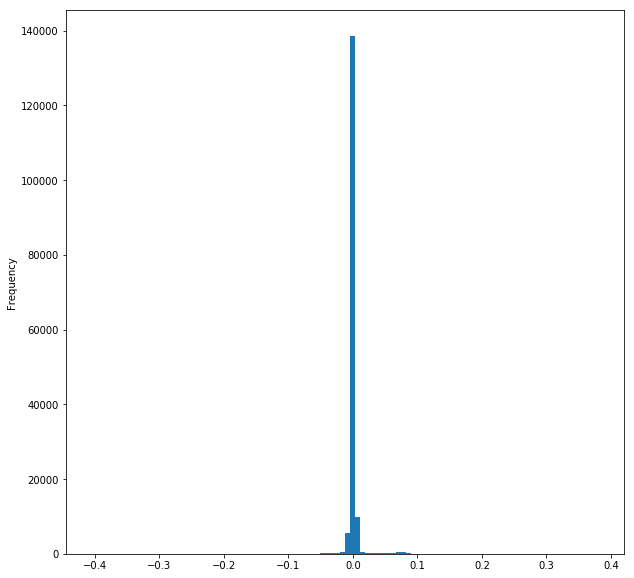

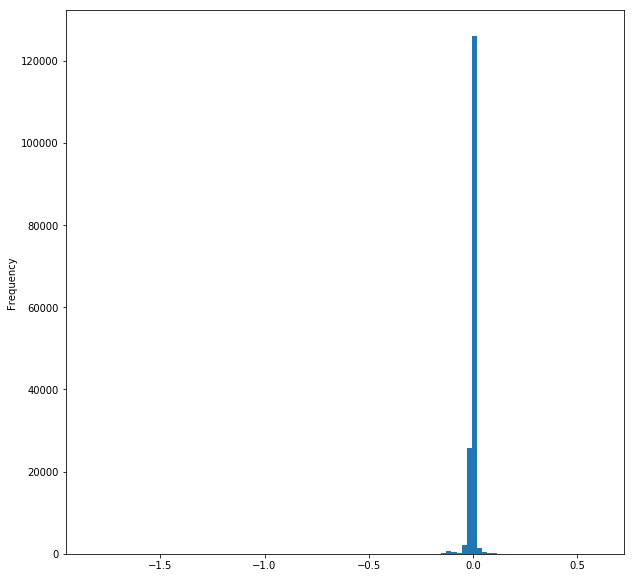

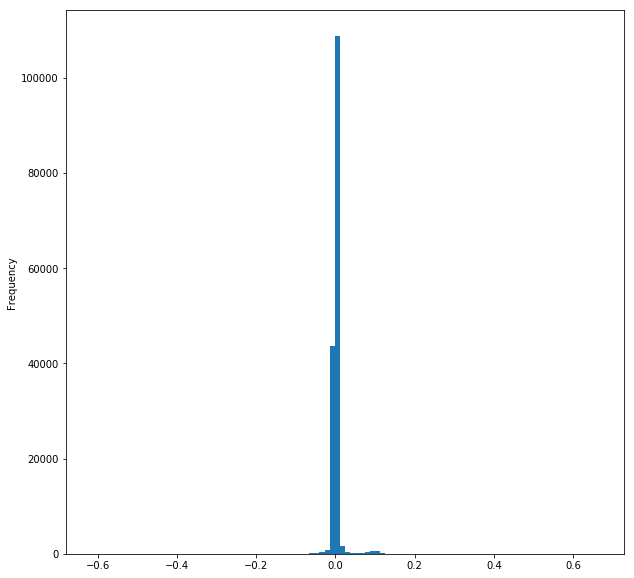

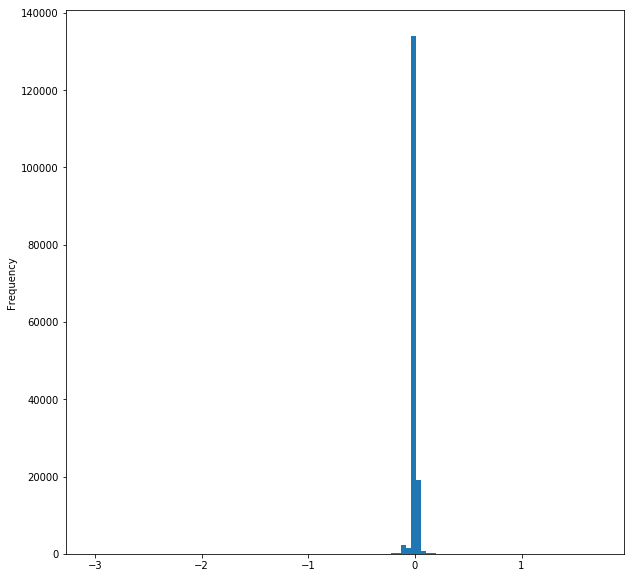

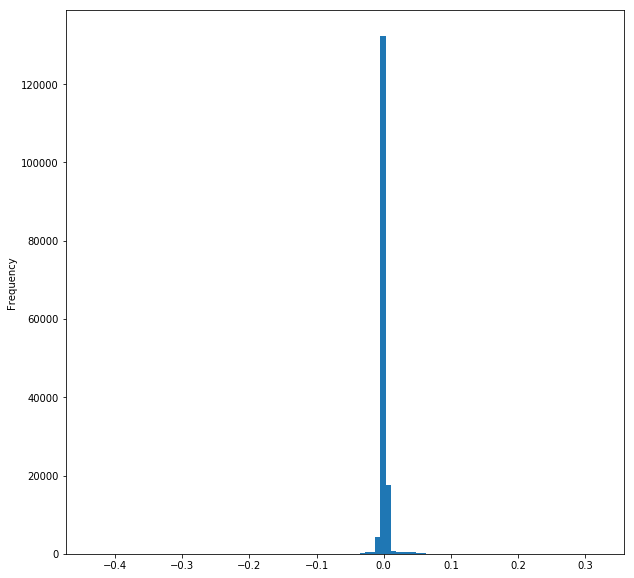

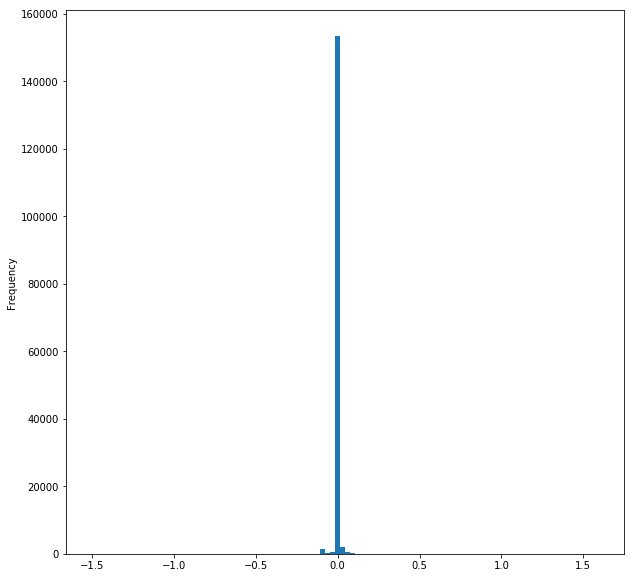

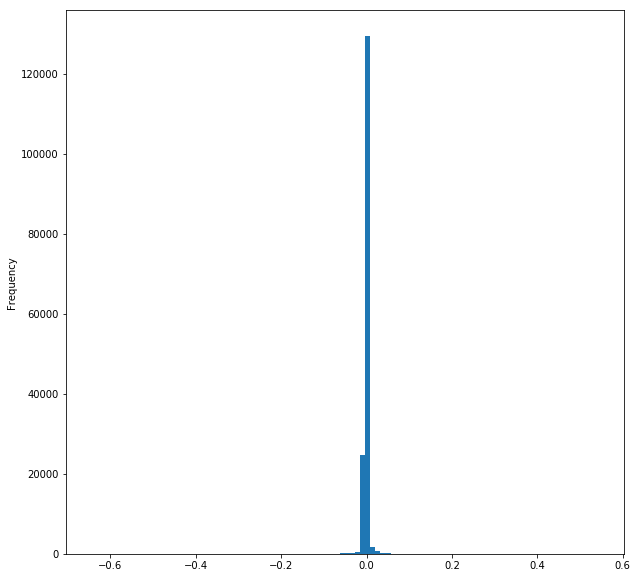

In [18]:
hist_plot(cbpm_hard, 'cbpm_h')

## Bunch Compressor(BC)
---
**parameters**

- HL1:BC:MV:ANGLE_R  / HL1:BC:MV:M1_ENCPOS_R
- HL2:BC:MV:ANGLE_R  / HL2:BC:MV:M1_ENCPOS_R      
- HL3B:BC:MV:ANGLE_R / HL3B:BC:MV:M1_ENCPOS_R
- SL3:BC:MV:ANGLE_R  / SL3:BC:MV:M1_ENCPOS_R

In [17]:
data_prep = data_pre()

In [18]:
bc_list = ['HL1:BC:MV:ANGLE_R', 'HL1:BC:MV:M1_ENCPOS_R',
           'HL2:BC:MV:ANGLE_R', 'HL2:BC:MV:M1_ENCPOS_R',
           'HL3B:BC:MV:ANGLE_R', 'HL3B:BC:MV:M1_ENCPOS_R',
           'SL3:BC:MV:ANGLE_R', 'SL3:BC:MV:M1_ENCPOS_R']

bc_json = ['HL1-BC-MV-ANGLE_R', 'HL1-BC-MV-M1_ENCPOS_R',
           'HL2-BC-MV-ANGLE_R', 'HL2-BC-MV-M1_ENCPOS_R',
           'HL3B-BC-MV-ANGLE_R', 'HL3B-BC-MV-M1_ENCPOS_R',
           'SL3-BC-MV-ANGLE_R', 'SL3-BC-MV-M1_ENCPOS_R']

bc_csv = ['HL1-BC-MV-ANGLE_R', 'HL1-BC-MV-M1_ENCPOS_R',
           'HL2-BC-MV-ANGLE_R', 'HL2-BC-MV-M1_ENCPOS_R',
           'HL3B-BC-MV-ANGLE_R', 'HL3B-BC-MV-M1_ENCPOS_R',
           'SL3-BC-MV-ANGLE_R', 'SL3-BC-MV-M1_ENCPOS_R']

In [21]:
data_prep.pooling(bc_list, bc_json)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [8]:
data_prep.json_to_csv(bc_json, 'bc', bc_csv)

All json data are converted to csv files


In [7]:
bc = data_prep.load_csv(bc_csv, 'bc')

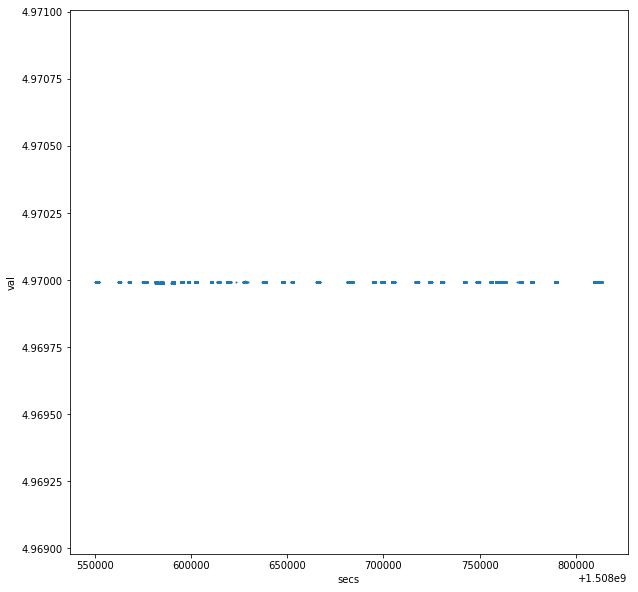

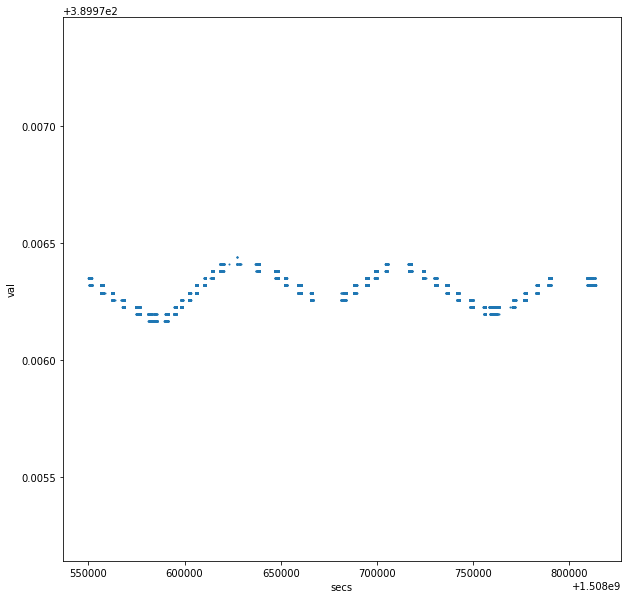

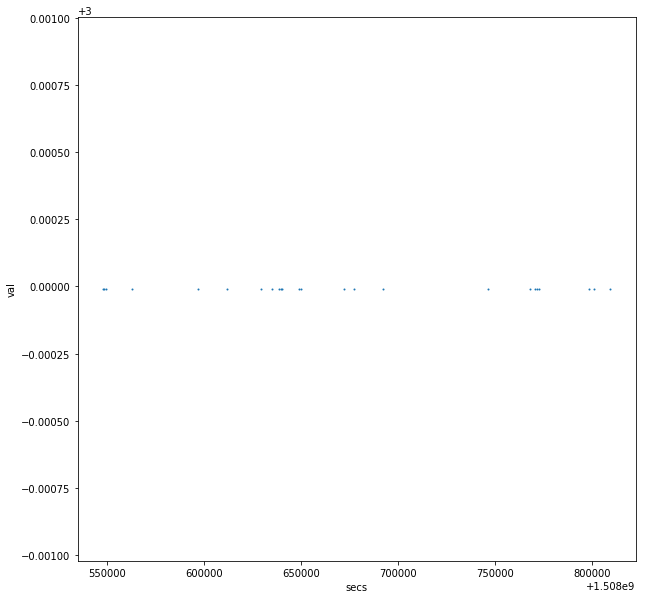

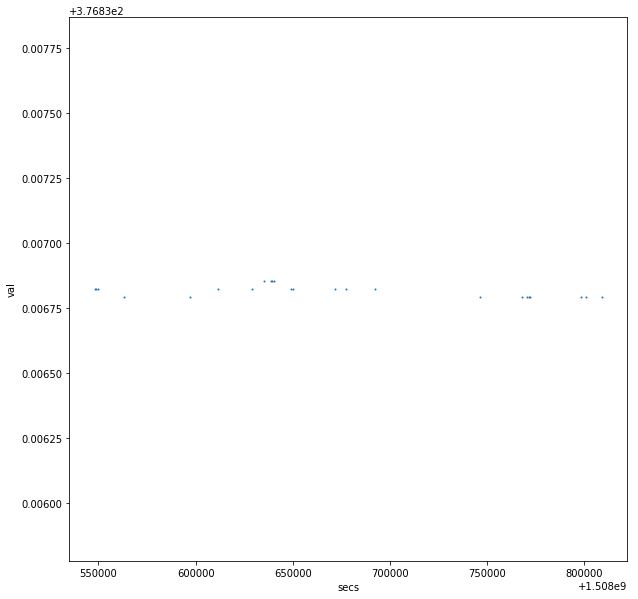

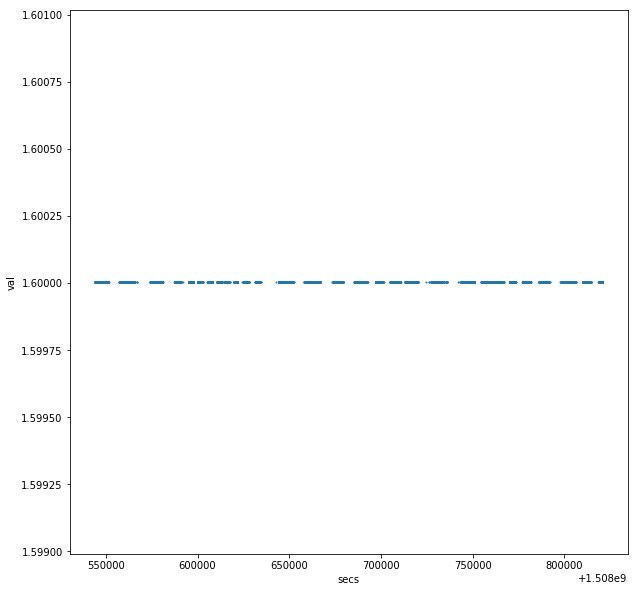

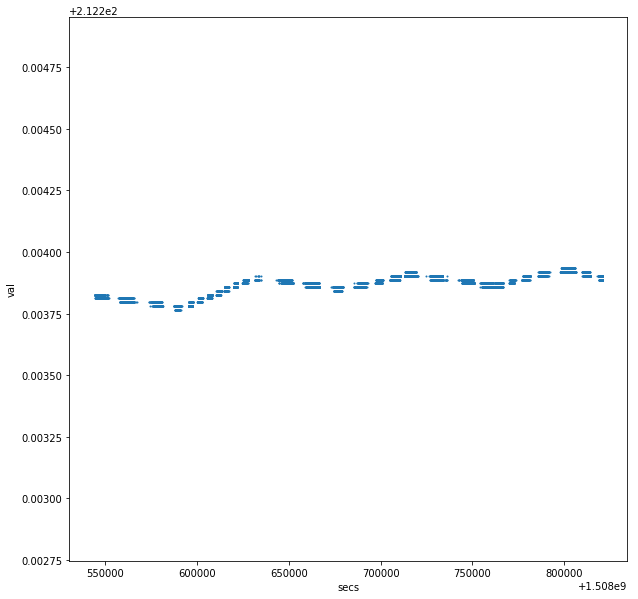

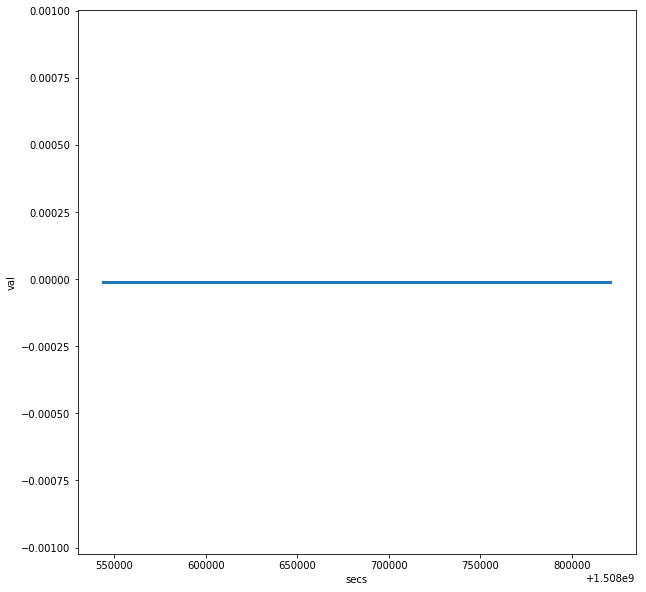

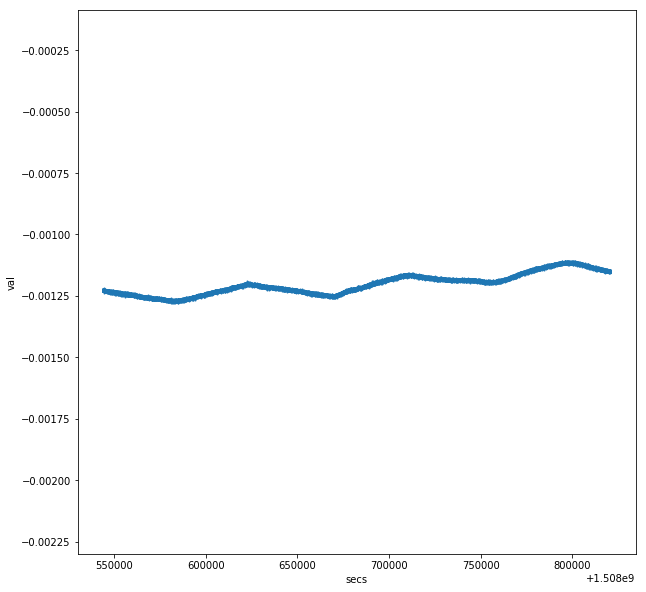

In [15]:
scatter_plot(bc, 'bc' ,s=1)

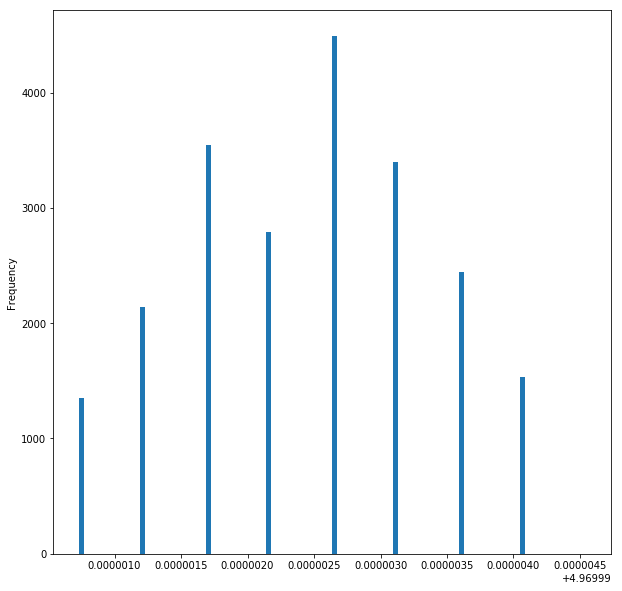

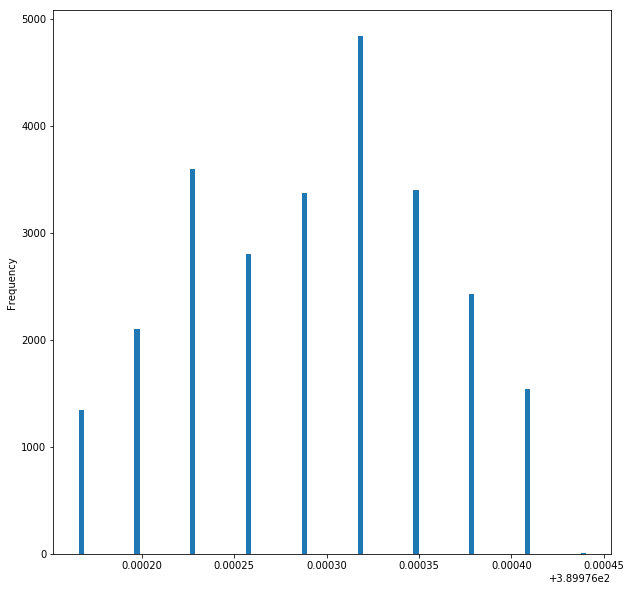

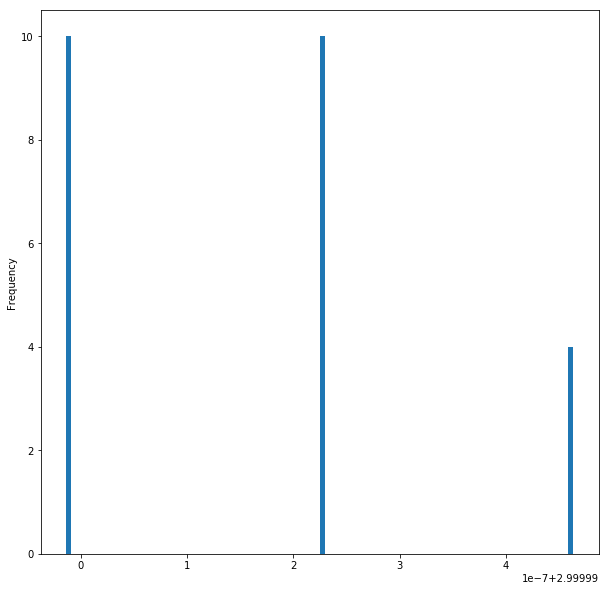

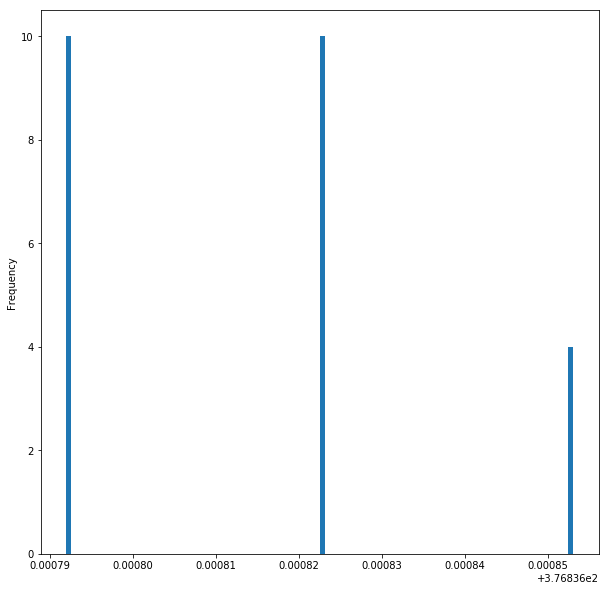

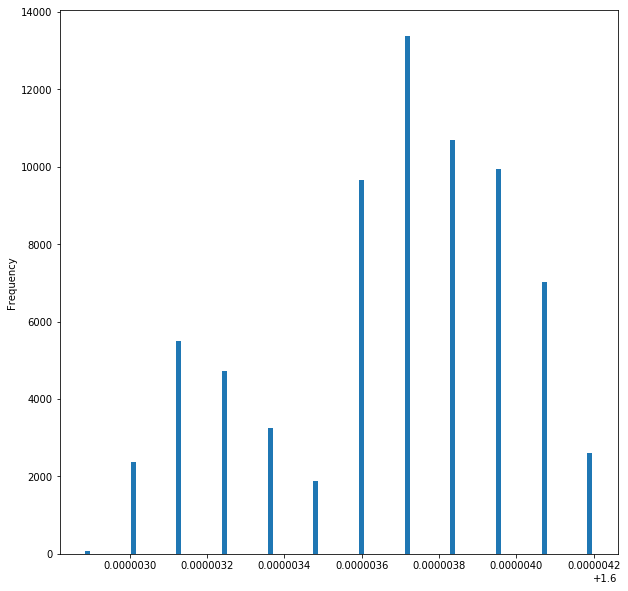

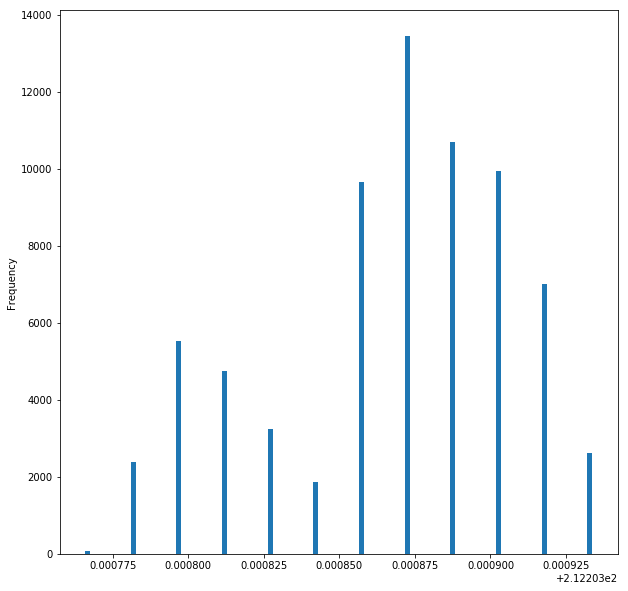

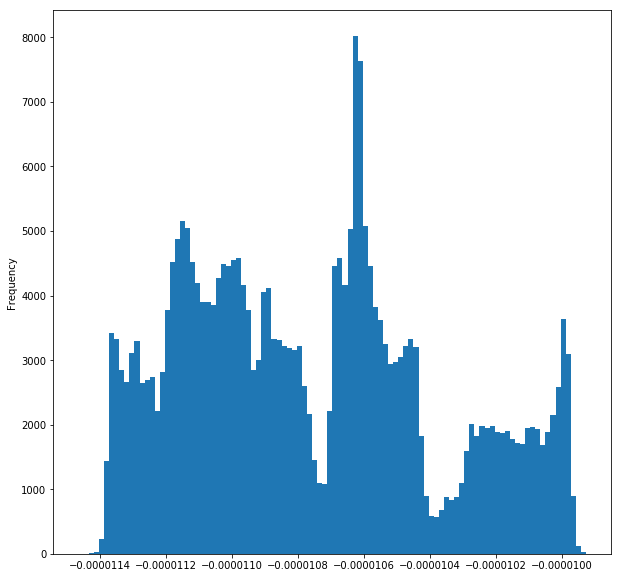

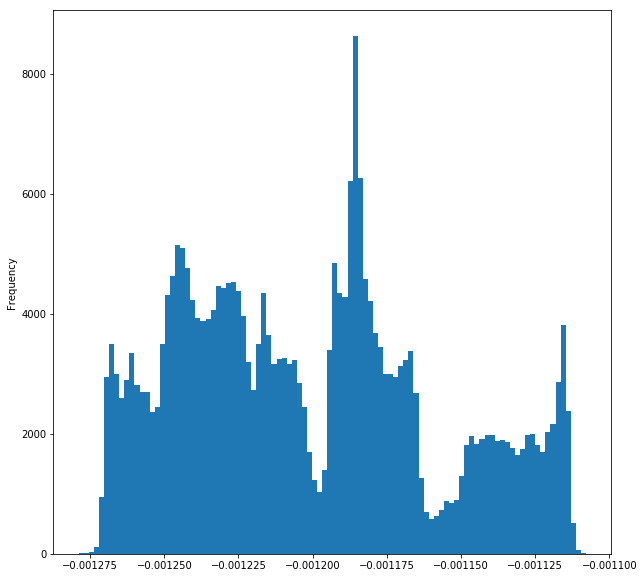

In [17]:
hist_plot(bc, 'bc')